In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler

# Load Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
trainDir = os.path.join('/content/drive/MyDrive/RM_4')

In [ ]:
filePath = '/content/drive/My Drive/RM_4/train.csv'
data = pd.read_csv(filePath)
# data = pd.read_csv('train.csv')

# EDA

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


dari data diatas terdapat 165034 data tidak ada null sama sekali

In [ ]:
data

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


In [ ]:
data.describe()

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.0000,1.650340e+05,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,82516.5000,1.569201e+07,656.454373,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,47641.3565,7.139782e+04,80.103340,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,0.0000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41258.2500,1.563314e+07,597.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,82516.5000,1.569017e+07,659.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,123774.7500,1.575682e+07,710.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,165033.0000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [ ]:
# data.hist()
# plt.rcParams['figure.figsize'] = [16, 12]
# plt.show()

In [ ]:
# sb.pairplot(data)

In [ ]:

# sb.boxplot(data)

In [ ]:
print(f'data NaN: \n{data.isna().sum()}\n')
print(f'data null: \n{data.isnull().sum()}\n')
print(f'data duplicates: \n{data.duplicated().sum()}\n')

data NaN: 
id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

data null: 
id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

data duplicates: 
0



In [ ]:
counts_data = data['CustomerId'].value_counts()
counts_data

,count
CustomerId,
15682355,121
15570194,99
15585835,98
15595588,91
15648067,90
...,...
15635203,1
15806982,1
15691104,1


# Preprocessing

## Drop Column unique

In [ ]:
data = data.drop(['id','CustomerId','Surname'], axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      165034 non-null  int64  
 1   Geography        165034 non-null  object 
 2   Gender           165034 non-null  object 
 3   Age              165034 non-null  float64
 4   Tenure           165034 non-null  int64  
 5   Balance          165034 non-null  float64
 6   NumOfProducts    165034 non-null  int64  
 7   HasCrCard        165034 non-null  float64
 8   IsActiveMember   165034 non-null  float64
 9   EstimatedSalary  165034 non-null  float64
 10  Exited           165034 non-null  int64  
dtypes: float64(5), int64(4), object(2)
memory usage: 13.9+ MB


## Convert type float to int

In [ ]:
data['Age'] = data['Age'].astype(int)
data['HasCrCard'] = data['HasCrCard'].astype(int)
data['IsActiveMember'] = data['IsActiveMember'].astype(int)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      165034 non-null  int64  
 1   Geography        165034 non-null  object 
 2   Gender           165034 non-null  object 
 3   Age              165034 non-null  int64  
 4   Tenure           165034 non-null  int64  
 5   Balance          165034 non-null  float64
 6   NumOfProducts    165034 non-null  int64  
 7   HasCrCard        165034 non-null  int64  
 8   IsActiveMember   165034 non-null  int64  
 9   EstimatedSalary  165034 non-null  float64
 10  Exited           165034 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 13.9+ MB


## Feature Engineering

### Age Grouping

In [ ]:
# age_bins = [0, 20, 40, 60, 80, float('inf')]
# age_labels = ['Youth', 'Young Adult', 'Adult', 'Senior', 'Elderly']
# data['AgeCategory'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels)
# data['AgeCategory'] = data['AgeCategory'].astype(object)

In [ ]:
# data

### Interaction Terms

In [ ]:
# data['CreditScore_Balance'] = data['CreditScore'] * data['Balance']
# data['CreditScore_EstimatedSalary'] = data['CreditScore'] * data['EstimatedSalary']
# data['Balance_EstimatedSalary'] = data['Balance'] * data['EstimatedSalary']

In [ ]:
# data

## Encode

In [ ]:
data_numerikal = data.select_dtypes(exclude=object)
data_kategorikal = data.select_dtypes(include=object)

encoder = LabelEncoder()

for col in data_kategorikal:
  data[col] = encoder.fit_transform(data[col])

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      165034 non-null  int64  
 1   Geography        165034 non-null  int64  
 2   Gender           165034 non-null  int64  
 3   Age              165034 non-null  int64  
 4   Tenure           165034 non-null  int64  
 5   Balance          165034 non-null  float64
 6   NumOfProducts    165034 non-null  int64  
 7   HasCrCard        165034 non-null  int64  
 8   IsActiveMember   165034 non-null  int64  
 9   EstimatedSalary  165034 non-null  float64
 10  Exited           165034 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 13.9 MB


In [ ]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,0,1,33,3,0.00,2,1,0,181449.97,0
1,627,0,1,33,1,0.00,2,1,1,49503.50,0
2,678,0,1,40,10,0.00,2,1,0,184866.69,0
3,581,0,1,34,2,148882.54,1,1,1,84560.88,0
4,716,2,1,33,5,0.00,2,1,1,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...
165029,667,2,0,33,2,0.00,1,1,1,131834.75,0
165030,792,0,1,35,3,0.00,1,0,0,131834.45,0
165031,565,0,1,31,5,0.00,1,1,1,127429.56,0
165032,554,2,0,30,7,161533.00,1,0,1,71173.03,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      165034 non-null  int64  
 1   Geography        165034 non-null  int64  
 2   Gender           165034 non-null  int64  
 3   Age              165034 non-null  int64  
 4   Tenure           165034 non-null  int64  
 5   Balance          165034 non-null  float64
 6   NumOfProducts    165034 non-null  int64  
 7   HasCrCard        165034 non-null  int64  
 8   IsActiveMember   165034 non-null  int64  
 9   EstimatedSalary  165034 non-null  float64
 10  Exited           165034 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 13.9 MB


## Normalization

In [ ]:
# numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# scaler = MinMaxScaler()

# data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

In [ ]:
# data

In [ ]:
# data.hist()
# plt.rcParams['figure.figsize'] = [16, 12]
# plt.show()

## Remove Outlier

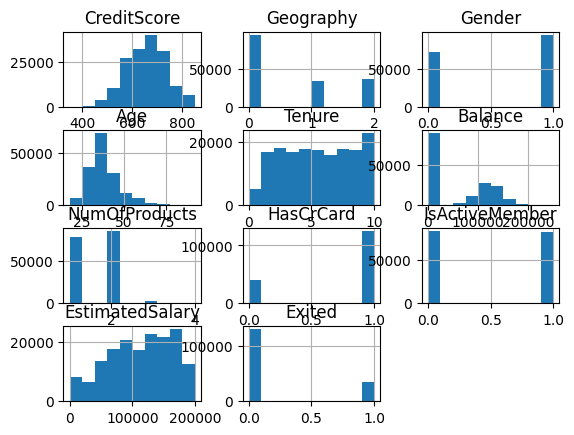

In [ ]:
data.hist()
plt.rcParams['figure.figsize'] = [16, 12]
plt.show()

<Axes: >

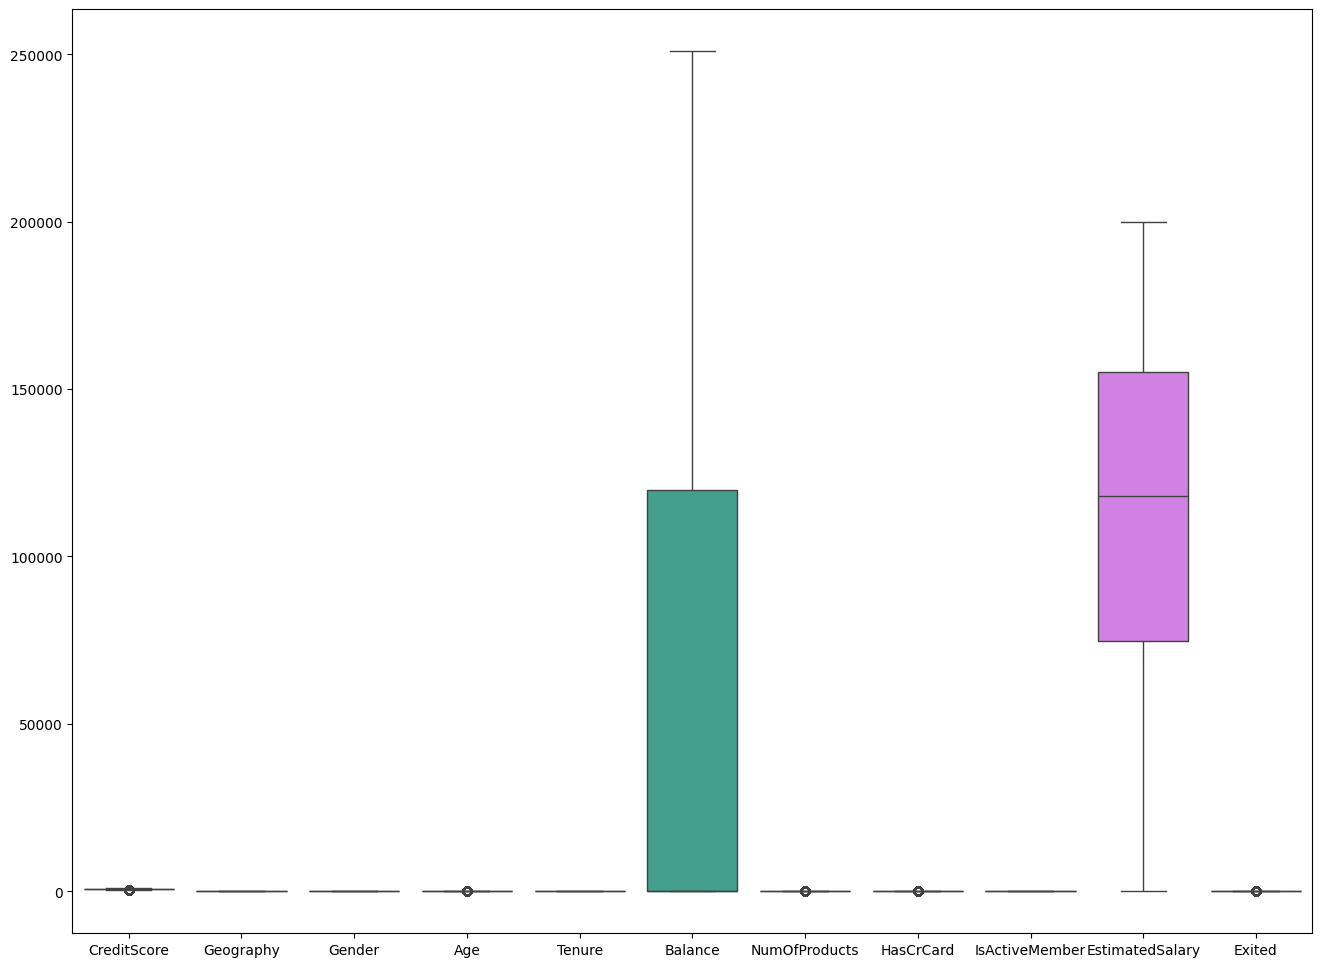

In [ ]:
sb.boxplot(data)

In [ ]:
data['Exited'].value_counts()

,count
Exited,
0,130113
1,34921


In [ ]:
Q3 = data['CreditScore'].quantile(0.75)
Q1 = data['CreditScore'].quantile(0.25)
IQR = Q3-Q1
LB = Q1 - (IQR * 1.5)
UB = Q3 + (IQR * 1.5)

temp = data[data['CreditScore']<=LB]
temp['Exited'].value_counts()

,count
Exited,
0,196
1,57


In [ ]:
data['Exited'].value_counts()

,count
Exited,
0,130113
1,34921


In [ ]:
data = data[data['CreditScore']>LB]

In [ ]:
Q3 = data['Age'].quantile(0.75)
Q1 = data['Age'].quantile(0.25)
IQR = Q3-Q1
LB = Q1 - (IQR * 1.5)
UB = Q3 + (IQR * 1.5)

temp = data[data['Age'] >= UB]
temp['Exited'].value_counts()

,count
Exited,
0,4392
1,2973


In [ ]:
data = data[data['Age'] < UB]

In [ ]:
data['Exited'].value_counts()

,count
Exited,
0,125525
1,31891


In [ ]:
# Q3 = data['Balance_EstimatedSalary'].quantile(0.75)
# Q1 = data['Balance_EstimatedSalary'].quantile(0.25)
# IQR = Q3-Q1
# LB = Q1 - (IQR * 1.5)
# UB = Q3 + (IQR * 1.5)

# temp = data[data['Balance_EstimatedSalary'] >= UB]
# temp['Exited'].value_counts()

In [ ]:
# data = data[data['Balance_EstimatedSalary'] < UB]

<Axes: >

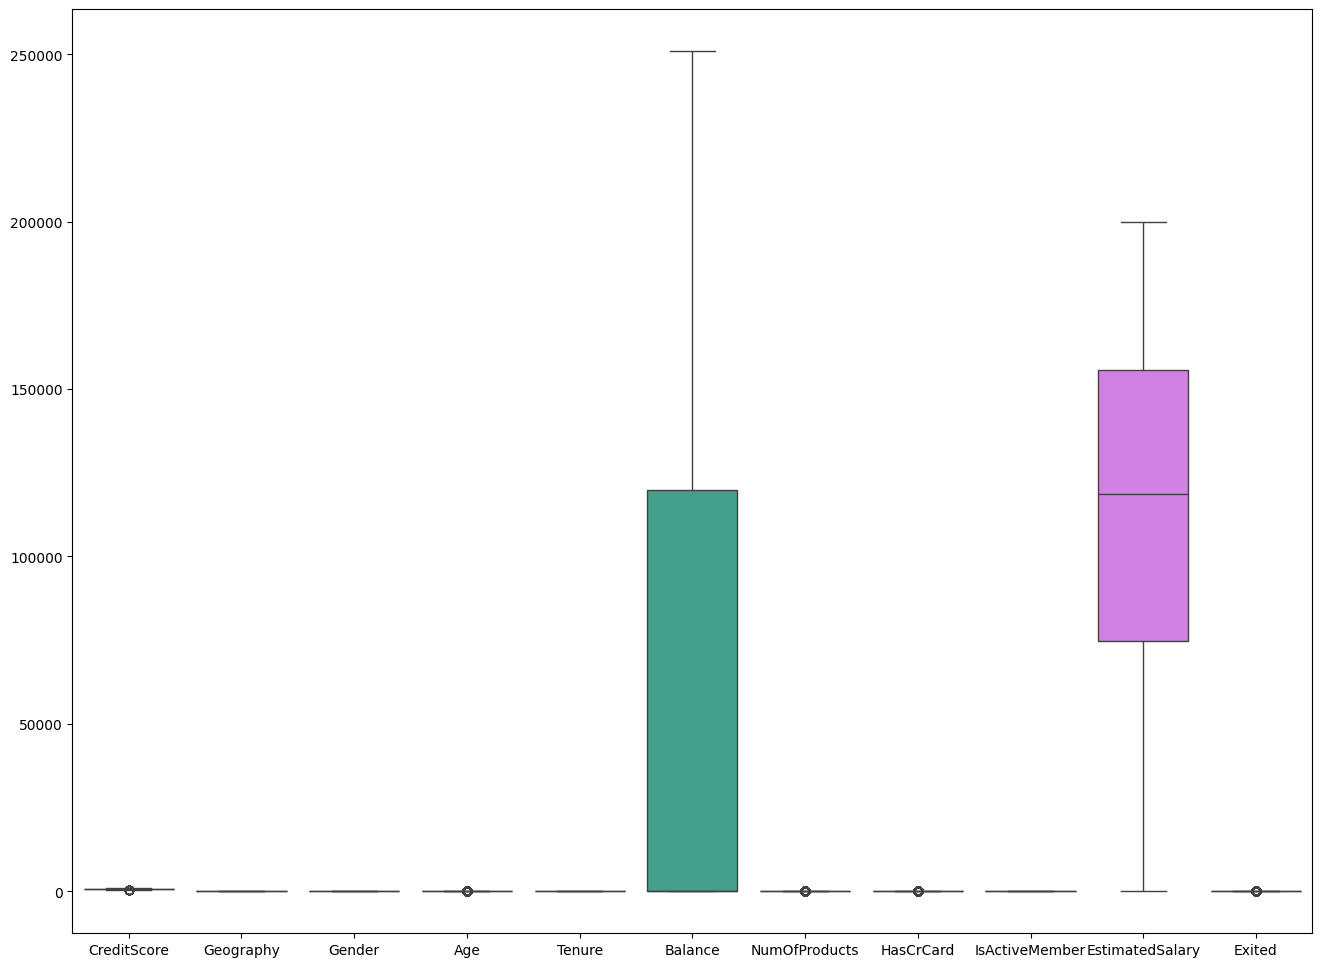

In [ ]:
sb.boxplot(data)

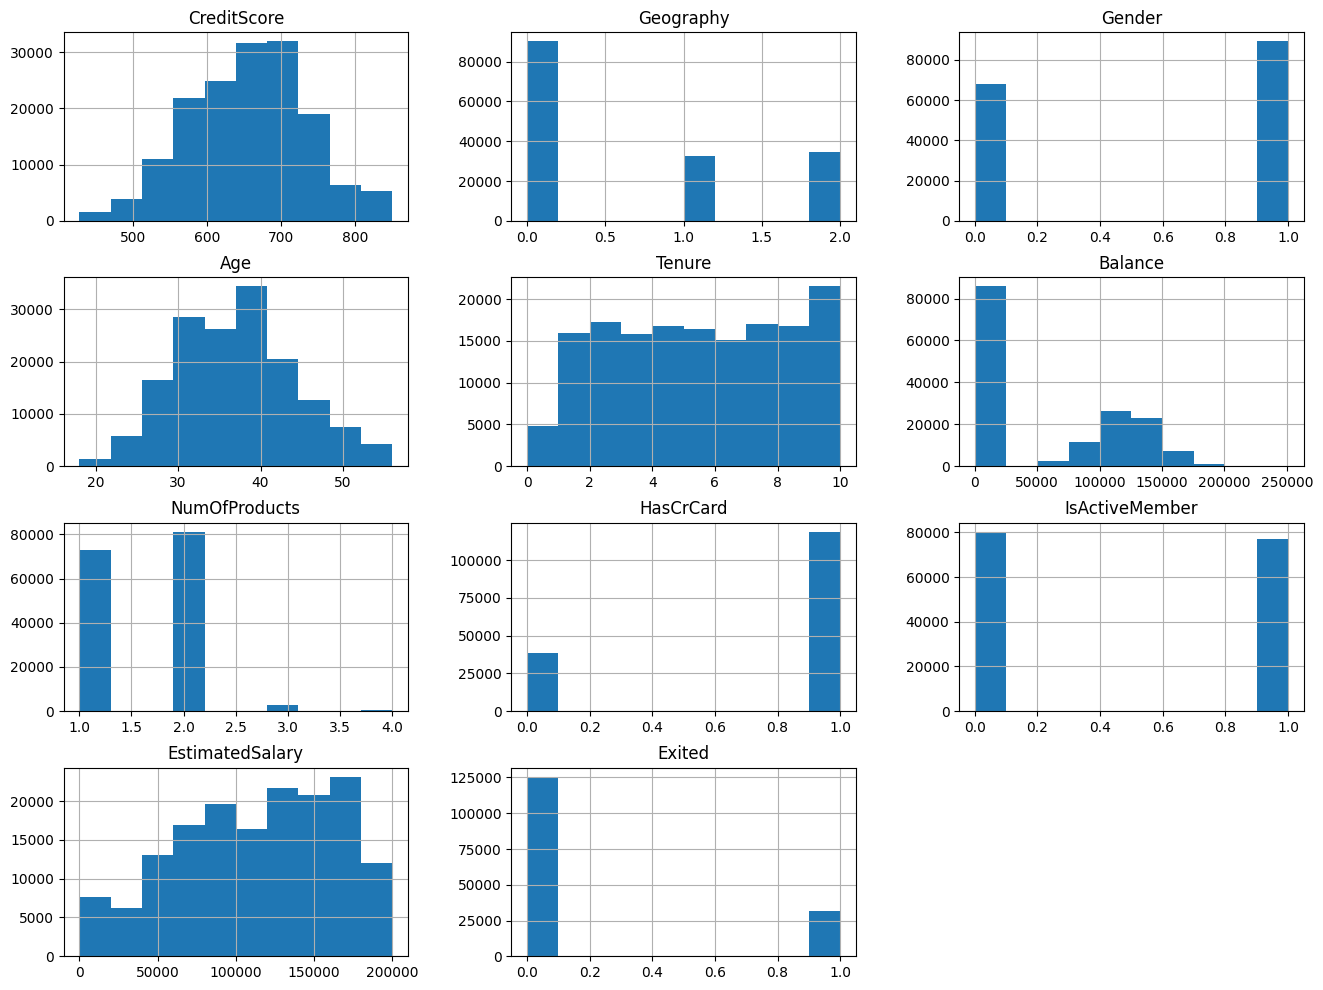

In [ ]:
data.hist()
plt.rcParams['figure.figsize'] = [16, 12]
plt.show()

## Standarisasi

In [ ]:
# columns_to_standardize = [
#     'CreditScore', 'Age', 'Tenure', 'Balance',
#     'NumOfProducts', 'EstimatedSalary',
#     'CreditScore_Balance', 'CreditScore_EstimatedSalary', 'Balance_EstimatedSalary'
# ]

# scaler = StandardScaler()

# data[columns_to_standardize] = scaler.fit_transform(data[columns_to_standardize])

In [ ]:
# data.hist()
# plt.rcParams['figure.figsize'] = [16, 12]
# plt.show()

# Feature Selection

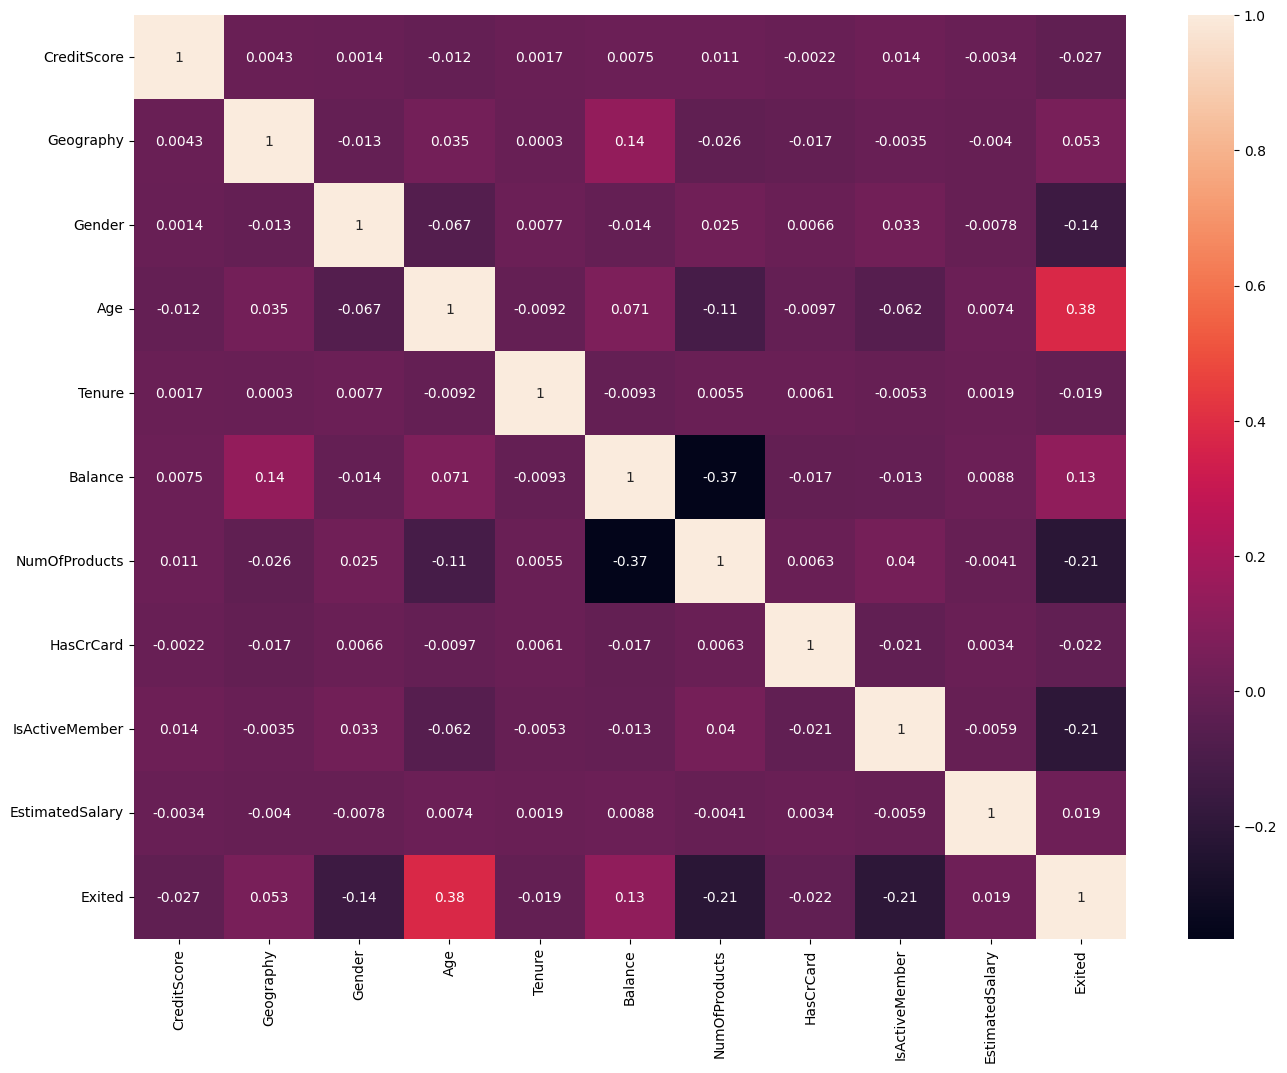

In [ ]:
corr_matrix = data.corr()
sb.heatmap(data = corr_matrix, annot=True)
plt.show()

In [ ]:
# data = data.drop(['AgeCategory'], axis=1)

In [ ]:
abs_corr = abs(corr_matrix['Exited'])
print(abs_corr.loc[abs_corr!=1.0].max())

0.37675466219445314


In [ ]:
# high_correlation = abs_corr[abs_corr>0.1]
# high_correlation = abs_corr[abs_corr>0.3769699521875153/4]
high_correlation = abs_corr[abs_corr>0]
choosen_feature = [col for col in data.columns if col in high_correlation]
print(choosen_feature)

['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


# MODEL

In [ ]:
x = data[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']]
y = data['Exited']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

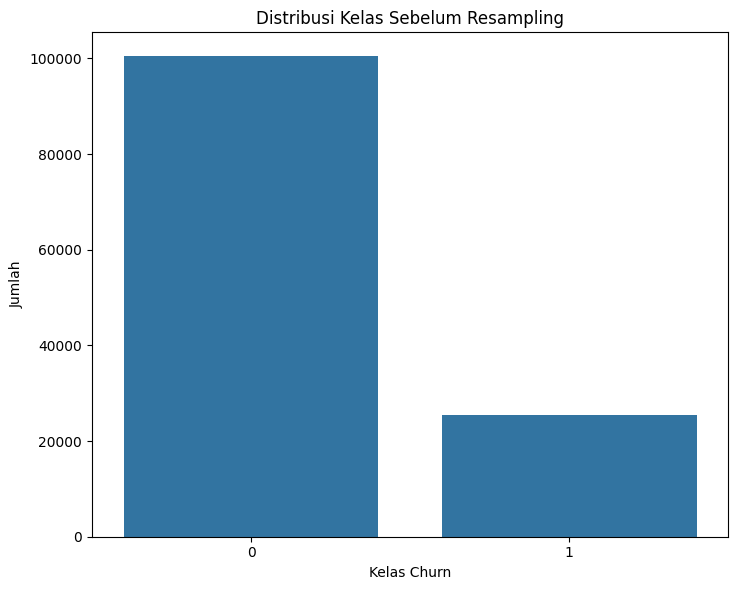

In [ ]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sb.countplot(x=y_train)
plt.title('Distribusi Kelas Sebelum Resampling')
plt.xlabel('Kelas Churn')
plt.ylabel('Jumlah')

plt.tight_layout()
plt.show()

In [ ]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

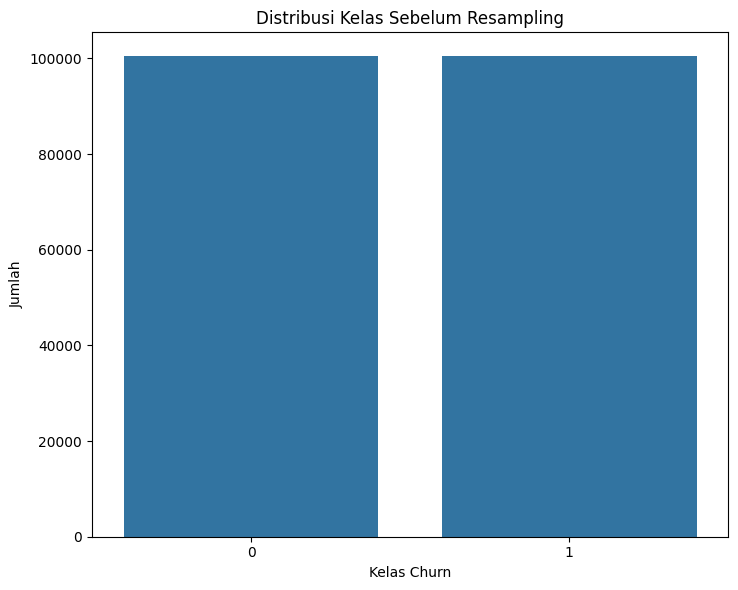

In [ ]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sb.countplot(x=y_train)
plt.title('Distribusi Kelas Sebelum Resampling')
plt.xlabel('Kelas Churn')
plt.ylabel('Jumlah')

plt.tight_layout()
plt.show()

In [ ]:
# rus = RandomUnderSampler(random_state=42)
# X_train, y_train = rus.fit_resample(X_train, y_train)

In [ ]:
# # numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns

# # scaler = MinMaxScaler()

# # data[numeric_columns] = scaler.fit_transform(data[numeric_columns])


scaler = MinMaxScaler()

# Normalisasi data X_train dan X_test
numeric_columns = X_train.select_dtypes(include=['float64', 'int64']).columns

X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])

In [ ]:
X_train

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.822275,0.0,1.0,0.631579,0.3,0.000000,0.333333,1.0,0.0,0.939036
1,0.116114,0.5,0.0,0.342105,0.2,0.529449,0.000000,1.0,1.0,0.377791
2,0.898104,1.0,0.0,0.657895,0.3,0.419916,0.333333,0.0,0.0,0.652451
3,0.635071,0.5,1.0,0.500000,0.1,0.518038,0.000000,1.0,1.0,0.518561
4,0.438389,0.0,1.0,0.526316,1.0,0.000000,0.000000,1.0,1.0,0.835201
...,...,...,...,...,...,...,...,...,...,...
200839,0.478673,0.0,0.0,0.631579,0.8,0.000000,0.000000,1.0,0.0,0.704476
200840,0.718009,0.5,0.0,0.763158,0.0,0.458868,0.000000,1.0,0.0,0.727750
200841,0.443128,0.5,0.0,0.394737,0.7,0.494085,0.000000,0.0,0.0,0.517870
200842,0.521327,0.5,0.0,0.710526,0.6,0.558060,0.000000,0.0,0.0,0.260028


In [ ]:
X_test

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
49215,0.604265,1.0,1.0,0.394737,0.6,0.000000,0.333333,1.0,1.0,0.528118
22214,0.353081,0.5,0.0,0.289474,0.4,0.443993,0.000000,1.0,0.0,0.955383
103831,0.428910,1.0,1.0,0.421053,0.6,0.000000,0.333333,1.0,0.0,0.951772
119918,0.398104,0.0,0.0,0.394737,0.2,0.000000,0.333333,1.0,0.0,0.658558
12502,0.362559,0.5,1.0,0.263158,0.3,0.390948,0.000000,1.0,1.0,0.133391
...,...,...,...,...,...,...,...,...,...,...
113428,0.438389,0.5,0.0,0.447368,0.1,0.494436,0.000000,1.0,0.0,0.917525
41617,0.364929,0.5,1.0,0.447368,0.8,0.448253,0.333333,1.0,0.0,0.844094
21266,0.402844,1.0,0.0,0.526316,0.4,0.000000,0.333333,0.0,1.0,0.868942
45074,0.677725,0.0,1.0,0.473684,1.0,0.000000,0.333333,1.0,1.0,0.607681


In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((200844, 10), (200844,), (31484, 10), (31484,))

Glorot Uniform with dropout

Epoch 1/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 32s 4ms/step - accuracy: 0.7589 - loss: 0.5025 - val_accuracy: 0.8032 - val_loss: 0.4153
Epoch 2/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - accuracy: 0.8113 - loss: 0.4204 - val_accuracy: 0.8144 - val_loss: 0.3901
Epoch 3/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 42s 4ms/step - accuracy: 0.8150 - loss: 0.4150 - val_accuracy: 0.8024 - val_loss: 0.4125
Epoch 4/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 38s 4ms/step - accuracy: 0.8139 - loss: 0.4122 - val_accuracy: 0.8278 - val_loss: 0.3936
Epoch 5/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 26s 4ms/step - accuracy: 0.8135 - loss: 0.4136 - val_accuracy: 0.8067 - val_loss: 0.4040
Epoch 6/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - accuracy: 0.8185 - loss: 0.4071 - val_accuracy: 0.8088 - val_loss: 0.4021
Epoch 7/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 44s 4ms/step - accuracy: 0.8140 - loss: 0.4059 - val_accuracy: 0.8194 - val_loss: 0.3872
Epoch 8/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - accuracy: 0.8154 - loss: 0

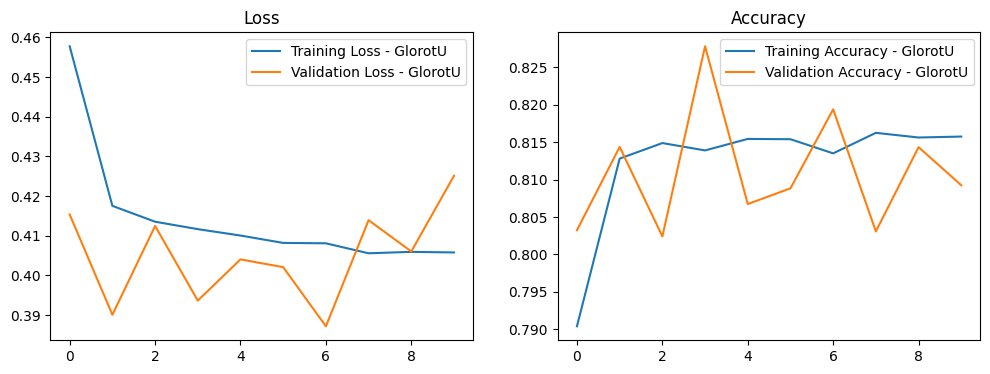

984/984 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


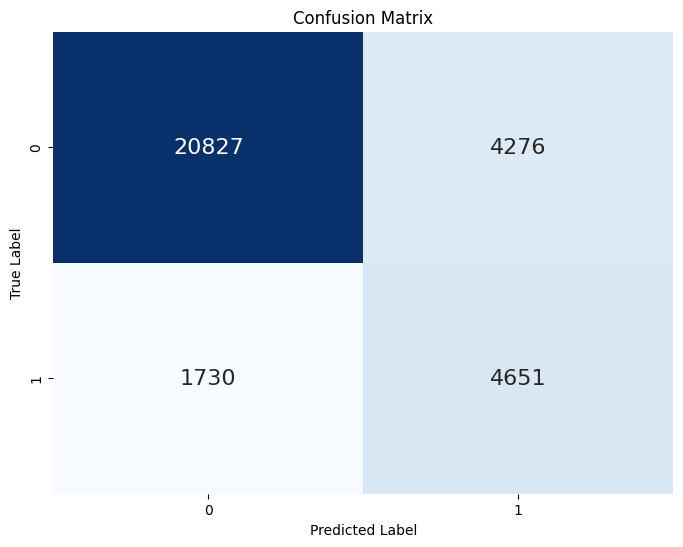

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.83      0.87     25103
           1       0.52      0.73      0.61      6381

    accuracy                           0.81     31484
   macro avg       0.72      0.78      0.74     31484
weighted avg       0.84      0.81      0.82     31484

ROC-AUC Score: 0.8624


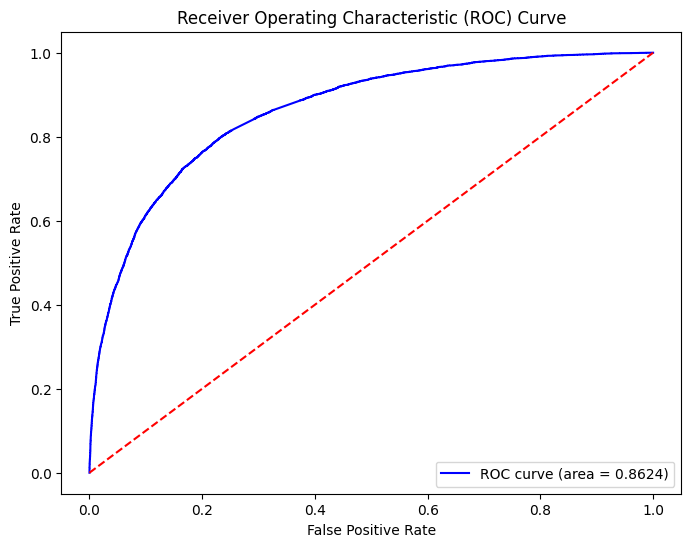

In [ ]:
from tensorflow.keras.initializers import GlorotNormal, HeNormal, RandomNormal, LecunNormal, GlorotUniform, HeUniform, RandomUniform, Zeros
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Define different initializers
initializer_glorotN = GlorotNormal()
initializer_heN = HeNormal()
initializer_randomN = RandomNormal()
initializer_lecunN = LecunNormal()
initializer_glorotU = GlorotUniform()
initializer_heU = HeUniform()
initializer_randomN = RandomUniform()
initializer_zeros = Zeros()


adam = Adam(learning_rate=0.001)

# Model definition with Glorot Normal Initialization
model_glorotU = Sequential([
    layers.Input(shape=(10,)),
    layers.Dense(256, activation='relu', kernel_initializer=initializer_glorotU),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu', kernel_initializer=initializer_glorotU),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu', kernel_initializer=initializer_glorotU),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu', kernel_initializer=initializer_glorotU),
    layers.Dropout(0.3),
    layers.Dense(16, activation='relu', kernel_initializer=initializer_glorotU),
    layers.Dropout(0.3),
    layers.Dense(8, activation='relu', kernel_initializer=initializer_glorotU),
    layers.Dropout(0.3),
    layers.Dense(4, activation='relu', kernel_initializer=initializer_glorotU),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])


# Compile model
model_glorotU.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history_glorotU = model_glorotU.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=10)

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_glorotU.history['loss'], label='Training Loss - GlorotU')
plt.plot(history_glorotU.history['val_loss'], label='Validation Loss - GlorotU')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history_glorotU.history['accuracy'], label='Training Accuracy - GlorotU')
plt.plot(history_glorotU.history['val_accuracy'], label='Validation Accuracy - GlorotU')
plt.legend()
plt.title('Accuracy')

plt.show()

# eval
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc

# After predicting the values
y_pred_prob = model_glorotU.predict(X_test)
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Glorot Uniform with dropout and batch normalization

Epoch 1/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 47s 7ms/step - accuracy: 0.7642 - loss: 0.5050 - val_accuracy: 0.8281 - val_loss: 0.4068
Epoch 2/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 80s 6ms/step - accuracy: 0.8281 - loss: 0.4109 - val_accuracy: 0.8185 - val_loss: 0.4205
Epoch 3/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 41s 6ms/step - accuracy: 0.8294 - loss: 0.4076 - val_accuracy: 0.8287 - val_loss: 0.4107
Epoch 4/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 40s 6ms/step - accuracy: 0.8306 - loss: 0.4037 - val_accuracy: 0.8271 - val_loss: 0.4120
Epoch 5/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 41s 6ms/step - accuracy: 0.8329 - loss: 0.4002 - val_accuracy: 0.8193 - val_loss: 0.4102
Epoch 6/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 43s 7ms/step - accuracy: 0.8337 - loss: 0.3997 - val_accuracy: 0.8179 - val_loss: 0.4177
Epoch 7/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step - accuracy: 0.8350 - loss: 0.3994 - val_accuracy: 0.8320 - val_loss: 0.3949
Epoch 8/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 37s 6ms/step - accuracy: 0.8351 - loss: 0

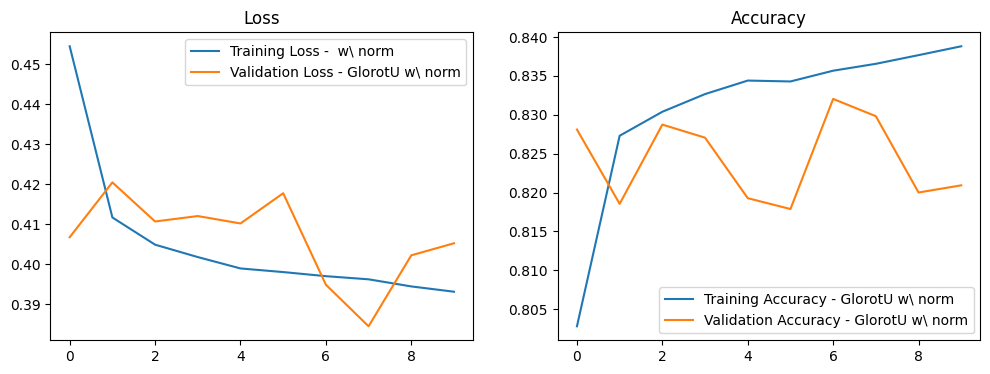

984/984 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


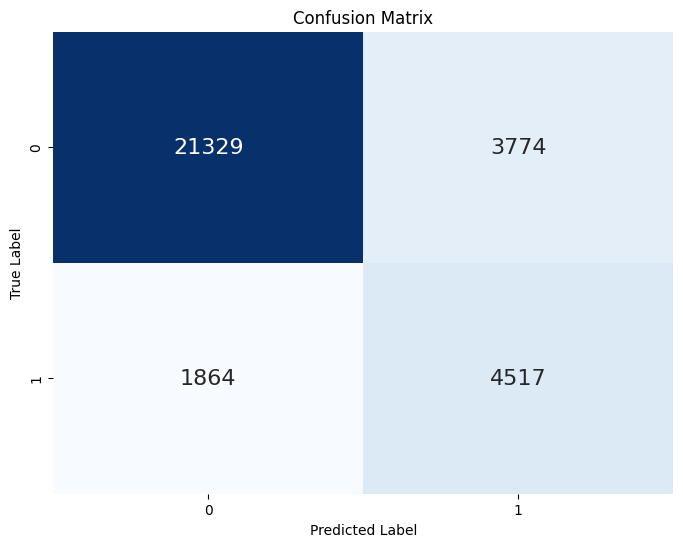

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.85      0.88     25103
           1       0.54      0.71      0.62      6381

    accuracy                           0.82     31484
   macro avg       0.73      0.78      0.75     31484
weighted avg       0.84      0.82      0.83     31484

ROC-AUC Score: 0.8659


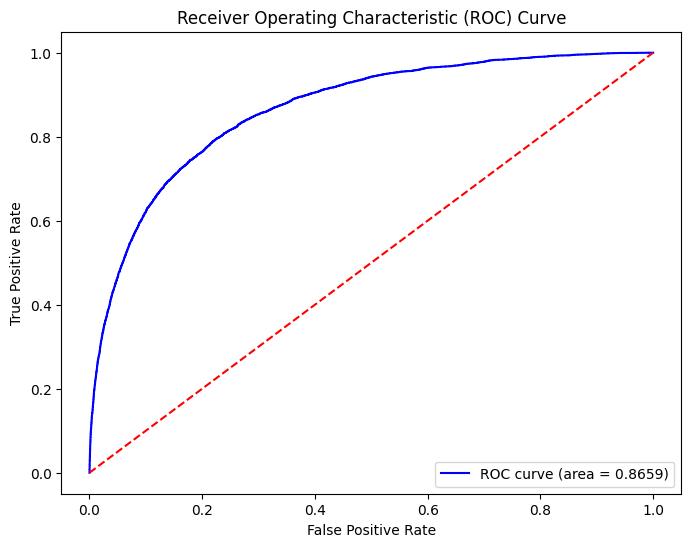

In [ ]:
from tensorflow.keras.initializers import GlorotNormal, HeNormal, RandomNormal, LecunNormal, GlorotUniform, HeUniform, RandomUniform, Zeros
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Define different initializers
initializer_glorotN = GlorotNormal()
initializer_heN = HeNormal()
initializer_randomN = RandomNormal()
initializer_lecunN = LecunNormal()
initializer_glorotU = GlorotUniform()
initializer_heU = HeUniform()
initializer_randomN = RandomUniform()
initializer_zeros = Zeros()


adam = Adam(learning_rate=0.001)

# Model definition with Glorot Normal Initialization
model_glorotU_full = Sequential([
    layers.Input(shape=(10,)),
    layers.Dense(256, activation='relu', kernel_initializer=initializer_glorotU),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu', kernel_initializer=initializer_glorotU),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu', kernel_initializer=initializer_glorotU),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu', kernel_initializer=initializer_glorotU),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(16, activation='relu', kernel_initializer=initializer_glorotU),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(8, activation='relu', kernel_initializer=initializer_glorotU),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(4, activation='relu', kernel_initializer=initializer_glorotU),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])


# Compile model
model_glorotU_full.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history_glorotU_full = model_glorotU_full.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=10)

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_glorotU_full.history['loss'], label='Training Loss -  w\ norm')
plt.plot(history_glorotU_full.history['val_loss'], label='Validation Loss - GlorotU w\ norm')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history_glorotU_full.history['accuracy'], label='Training Accuracy - GlorotU w\ norm')
plt.plot(history_glorotU_full.history['val_accuracy'], label='Validation Accuracy - GlorotU w\ norm')
plt.legend()
plt.title('Accuracy')

plt.show()

# eval
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc

# After predicting the values
y_pred_prob = model_glorotU_full.predict(X_test)
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

tahn

Epoch 1/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 46s 5ms/step - accuracy: 0.7664 - loss: 0.5220 - val_accuracy: 0.8074 - val_loss: 0.4551
Epoch 2/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 59s 3ms/step - accuracy: 0.8137 - loss: 0.4470 - val_accuracy: 0.8111 - val_loss: 0.4378
Epoch 3/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8225 - loss: 0.4324 - val_accuracy: 0.8091 - val_loss: 0.4251
Epoch 4/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8227 - loss: 0.4235 - val_accuracy: 0.8164 - val_loss: 0.4131
Epoch 5/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8260 - loss: 0.4174 - val_accuracy: 0.8315 - val_loss: 0.3904
Epoch 6/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.8286 - loss: 0.4108 - val_accuracy: 0.8177 - val_loss: 0.4198
Epoch 7/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.8277 - loss: 0.4096 - val_accuracy: 0.8313 - val_loss: 0.3942
Epoch 8/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8306 - loss: 0

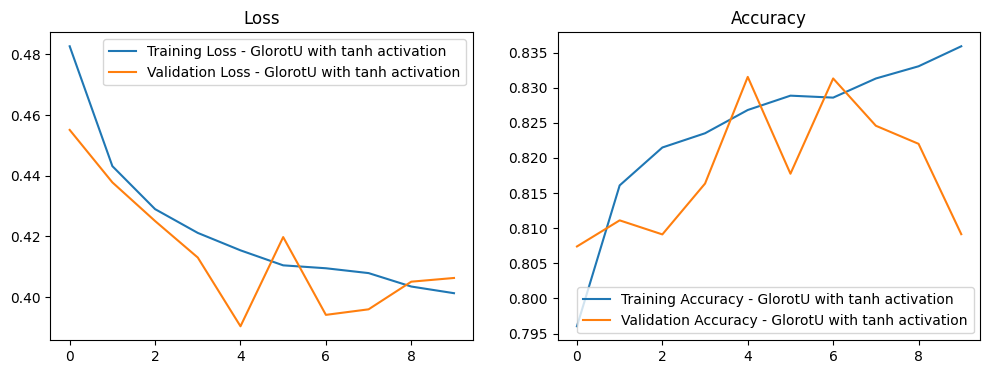

984/984 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


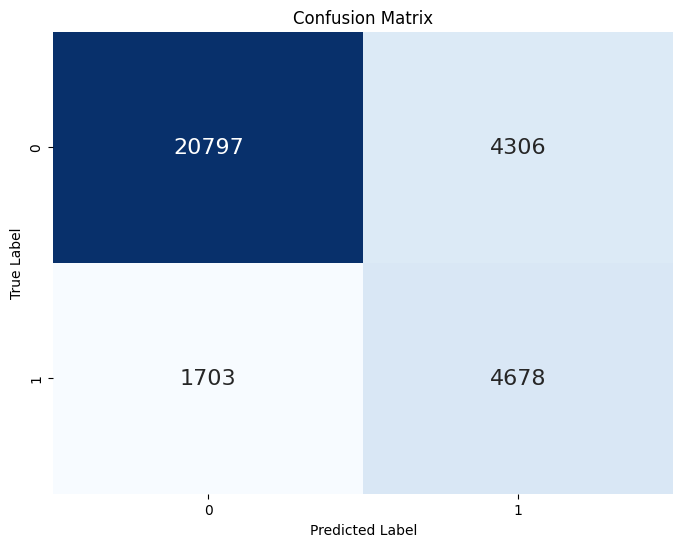

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.83      0.87     25103
           1       0.52      0.73      0.61      6381

    accuracy                           0.81     31484
   macro avg       0.72      0.78      0.74     31484
weighted avg       0.84      0.81      0.82     31484

ROC-AUC Score: 0.8648


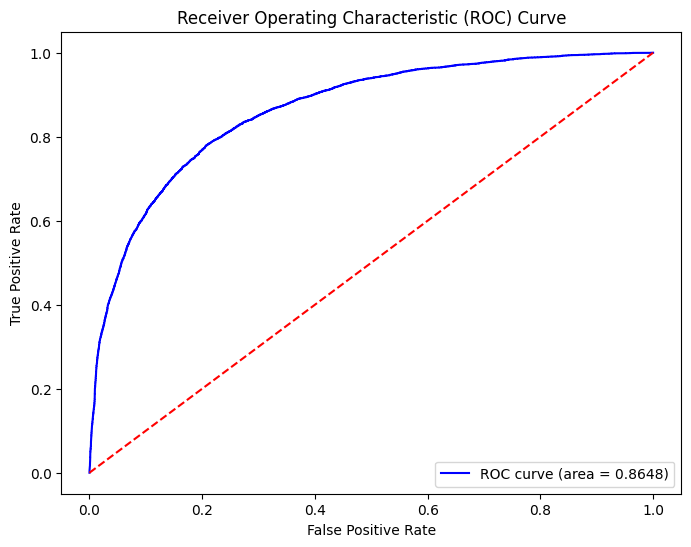

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from tensorflow.keras.initializers import GlorotNormal, HeNormal, RandomNormal, LecunNormal, GlorotUniform, HeUniform, RandomUniform, Zeros
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc

# Define different initializers
initializer_glorotN = GlorotNormal()
initializer_heN = HeNormal()
initializer_randomN = RandomNormal()
initializer_lecunN = LecunNormal()
initializer_glorotU = GlorotUniform()
initializer_heU = HeUniform()
initializer_randomN = RandomUniform()
initializer_zeros = Zeros()

adam = Adam(learning_rate=0.001)

# Model definition with Glorot Uniform Initialization and tanh activation
model_glorotU_full = Sequential([
    layers.Input(shape=(10,)),
    layers.Dense(256, activation='tanh', kernel_initializer=initializer_glorotU),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(128, activation='tanh', kernel_initializer=initializer_glorotU),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(64, activation='tanh', kernel_initializer=initializer_glorotU),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(32, activation='tanh', kernel_initializer=initializer_glorotU),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(16, activation='tanh', kernel_initializer=initializer_glorotU),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(8, activation='tanh', kernel_initializer=initializer_glorotU),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(4, activation='tanh', kernel_initializer=initializer_glorotU),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

# Compile model
model_glorotU_full.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history_glorotU_full = model_glorotU_full.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=10)

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_glorotU_full.history['loss'], label='Training Loss - GlorotU with tanh activation')
plt.plot(history_glorotU_full.history['val_loss'], label='Validation Loss - GlorotU with tanh activation')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history_glorotU_full.history['accuracy'], label='Training Accuracy - GlorotU with tanh activation')
plt.plot(history_glorotU_full.history['val_accuracy'], label='Validation Accuracy - GlorotU with tanh activation')
plt.legend()
plt.title('Accuracy')

plt.show()

# Evaluate
# After predicting the values
y_pred_prob = model_glorotU_full.predict(X_test)
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Epoch 1/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 34s 4ms/step - accuracy: 0.7946 - loss: 0.4865 - val_accuracy: 0.8129 - val_loss: 0.4268
Epoch 2/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.8173 - loss: 0.4411 - val_accuracy: 0.8397 - val_loss: 0.4075
Epoch 3/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.8265 - loss: 0.4192 - val_accuracy: 0.8247 - val_loss: 0.4242
Epoch 4/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.8314 - loss: 0.4114 - val_accuracy: 0.8344 - val_loss: 0.4102
Epoch 5/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.8342 - loss: 0.4056 - val_accuracy: 0.8185 - val_loss: 0.4170
Epoch 6/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.8330 - loss: 0.4066 - val_accuracy: 0.7962 - val_loss: 0.4347
Epoch 7/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.8339 - loss: 0.4049 - val_accuracy: 0.8266 - val_loss: 0.4229
Epoch 8/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.8340 - loss: 0

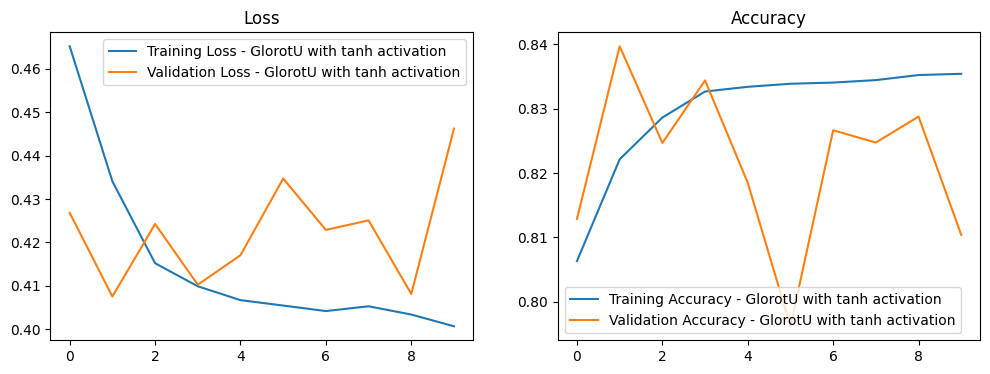

984/984 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


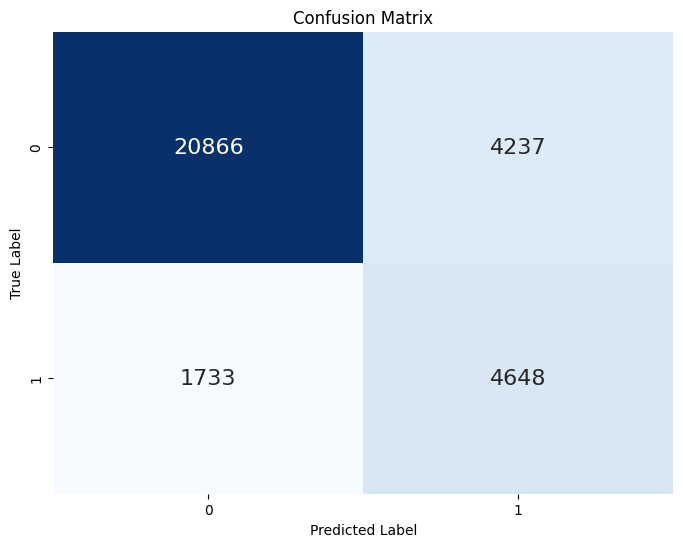

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.83      0.87     25103
           1       0.52      0.73      0.61      6381

    accuracy                           0.81     31484
   macro avg       0.72      0.78      0.74     31484
weighted avg       0.84      0.81      0.82     31484

ROC-AUC Score: 0.8612


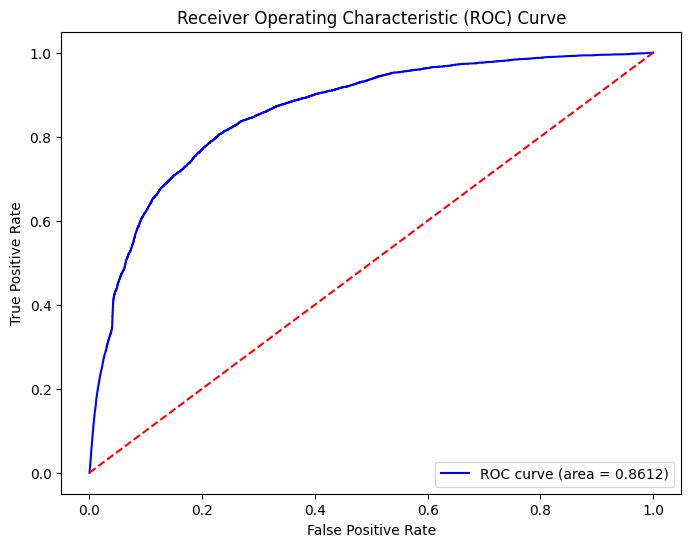

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from tensorflow.keras.initializers import GlorotNormal, HeNormal, RandomNormal, LecunNormal, GlorotUniform, HeUniform, RandomUniform, Zeros
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc

# Define different initializers
initializer_glorotN = GlorotNormal()
initializer_heN = HeNormal()
initializer_randomN = RandomNormal()
initializer_lecunN = LecunNormal()
initializer_glorotU = GlorotUniform()
initializer_heU = HeUniform()
initializer_randomN = RandomUniform()
initializer_zeros = Zeros()

adam = Adam(learning_rate=0.001)

# Model definition with Glorot Uniform Initialization and tanh activation
model_glorotU_full_tahn = Sequential([
    layers.Input(shape=(10,)),
    layers.Dense(256, activation='tanh', kernel_initializer=initializer_glorotU),
    layers.Dropout(0.3),
    layers.Dense(128, activation='tanh', kernel_initializer=initializer_glorotU),
    layers.Dropout(0.3),
    layers.Dense(64, activation='tanh', kernel_initializer=initializer_glorotU),
    layers.Dropout(0.3),
    layers.Dense(32, activation='tanh', kernel_initializer=initializer_glorotU),
    layers.Dropout(0.3),
    layers.Dense(16, activation='tanh', kernel_initializer=initializer_glorotU),
    layers.Dropout(0.3),
    layers.Dense(8, activation='tanh', kernel_initializer=initializer_glorotU),
    layers.Dropout(0.3),
    layers.Dense(4, activation='tanh', kernel_initializer=initializer_glorotU),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

# Compile model
model_glorotU_full_tahn.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history_glorotU_full_tahn = model_glorotU_full_tahn.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=10)

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_glorotU_full_tahn.history['loss'], label='Training Loss - GlorotU with tanh activation')
plt.plot(history_glorotU_full_tahn.history['val_loss'], label='Validation Loss - GlorotU with tanh activation')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history_glorotU_full_tahn.history['accuracy'], label='Training Accuracy - GlorotU with tanh activation')
plt.plot(history_glorotU_full_tahn.history['val_accuracy'], label='Validation Accuracy - GlorotU with tanh activation')
plt.legend()
plt.title('Accuracy')

plt.show()

# Evaluate
# After predicting the values
y_pred_prob = model_glorotU_full_tahn.predict(X_test)
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


he Uniform with dropout

Epoch 1/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 31s 5ms/step - accuracy: 0.7077 - loss: 0.5614 - val_accuracy: 0.8194 - val_loss: 0.4488
Epoch 2/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - accuracy: 0.8017 - loss: 0.4530 - val_accuracy: 0.8436 - val_loss: 0.3805
Epoch 3/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 41s 4ms/step - accuracy: 0.8091 - loss: 0.4427 - val_accuracy: 0.8238 - val_loss: 0.4484
Epoch 4/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - accuracy: 0.8138 - loss: 0.4377 - val_accuracy: 0.8280 - val_loss: 0.4443
Epoch 5/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 39s 4ms/step - accuracy: 0.8124 - loss: 0.4360 - val_accuracy: 0.8237 - val_loss: 0.4552
Epoch 6/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 45s 5ms/step - accuracy: 0.8143 - loss: 0.4312 - val_accuracy: 0.8356 - val_loss: 0.4042
Epoch 7/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - accuracy: 0.8138 - loss: 0.4321 - val_accuracy: 0.8384 - val_loss: 0.3999
Epoch 8/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - accuracy: 0.8136 - loss: 0

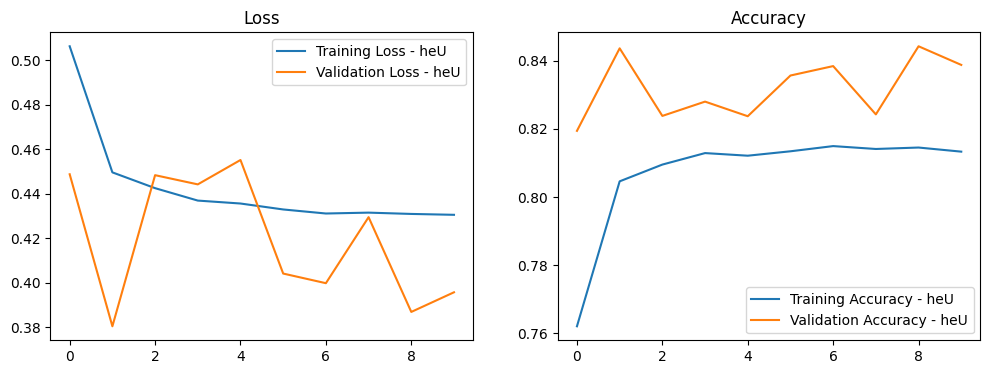

984/984 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


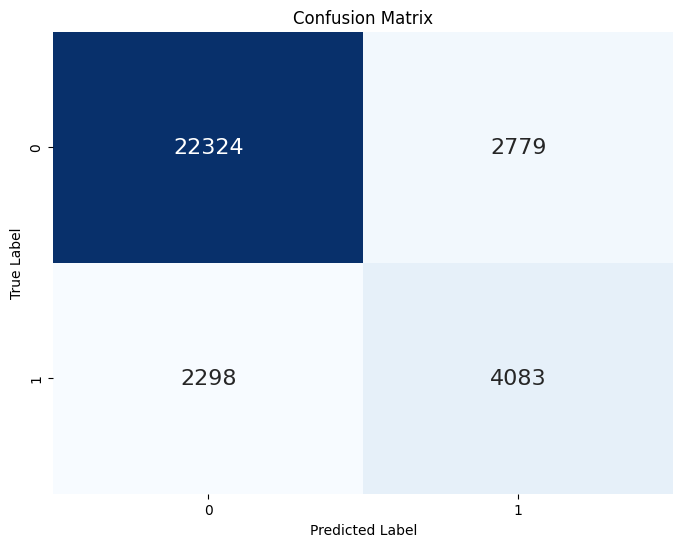

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.89      0.90     25103
           1       0.60      0.64      0.62      6381

    accuracy                           0.84     31484
   macro avg       0.75      0.76      0.76     31484
weighted avg       0.84      0.84      0.84     31484

ROC-AUC Score: 0.8642


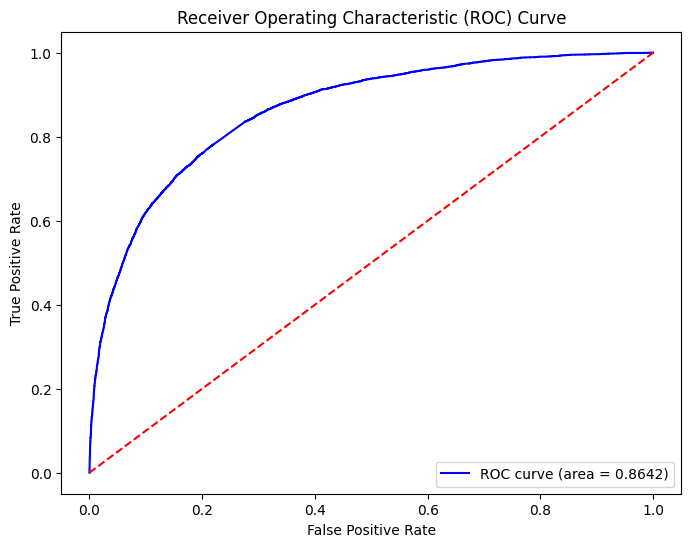

In [ ]:
from tensorflow.keras.initializers import GlorotNormal, HeNormal, RandomNormal, LecunNormal, GlorotUniform, HeUniform, RandomUniform, Zeros
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Define different initializers
initializer_glorotN = GlorotNormal()
initializer_heN = HeNormal()
initializer_randomN = RandomNormal()
initializer_lecunN = LecunNormal()
initializer_glorotU = GlorotUniform()
initializer_heU = HeUniform()
initializer_randomN = RandomUniform()
initializer_zeros = Zeros()


adam = Adam(learning_rate=0.001)

# Model definition with Glorot Normal Initialization
model_heU = Sequential([
    layers.Input(shape=(10,)),
    layers.Dense(256, activation='relu', kernel_initializer=initializer_heU),
    # layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu', kernel_initializer=initializer_heU),
    # layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu', kernel_initializer=initializer_heU),
    # layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu', kernel_initializer=initializer_heU),
    # layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(16, activation='relu', kernel_initializer=initializer_heU),
    # layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(8, activation='relu', kernel_initializer=initializer_heU),
    # layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(4, activation='relu', kernel_initializer=initializer_heU),
    # layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])


# Compile model
model_heU.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history_heU = model_heU.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=10)

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_heU.history['loss'], label='Training Loss - heU')
plt.plot(history_heU.history['val_loss'], label='Validation Loss - heU')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history_heU.history['accuracy'], label='Training Accuracy - heU')
plt.plot(history_heU.history['val_accuracy'], label='Validation Accuracy - heU')
plt.legend()
plt.title('Accuracy')

plt.show()

# eval
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc

# After predicting the values
y_pred_prob = model_heU.predict(X_test)
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

he Uniform with dropout and normalize

Epoch 1/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 49s 7ms/step - accuracy: 0.7185 - loss: 0.5699 - val_accuracy: 0.8230 - val_loss: 0.4114
Epoch 2/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 84s 7ms/step - accuracy: 0.8177 - loss: 0.4260 - val_accuracy: 0.8144 - val_loss: 0.4127
Epoch 3/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 81s 7ms/step - accuracy: 0.8287 - loss: 0.4075 - val_accuracy: 0.8212 - val_loss: 0.4112
Epoch 4/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 80s 7ms/step - accuracy: 0.8329 - loss: 0.4036 - val_accuracy: 0.8171 - val_loss: 0.4198
Epoch 5/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 80s 6ms/step - accuracy: 0.8338 - loss: 0.4007 - val_accuracy: 0.8266 - val_loss: 0.4090
Epoch 6/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 44s 7ms/step - accuracy: 0.8342 - loss: 0.3997 - val_accuracy: 0.8249 - val_loss: 0.4096
Epoch 7/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 40s 6ms/step - accuracy: 0.8369 - loss: 0.3972 - val_accuracy: 0.8265 - val_loss: 0.4118
Epoch 8/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 41s 7ms/step - accuracy: 0.8355 - loss: 0

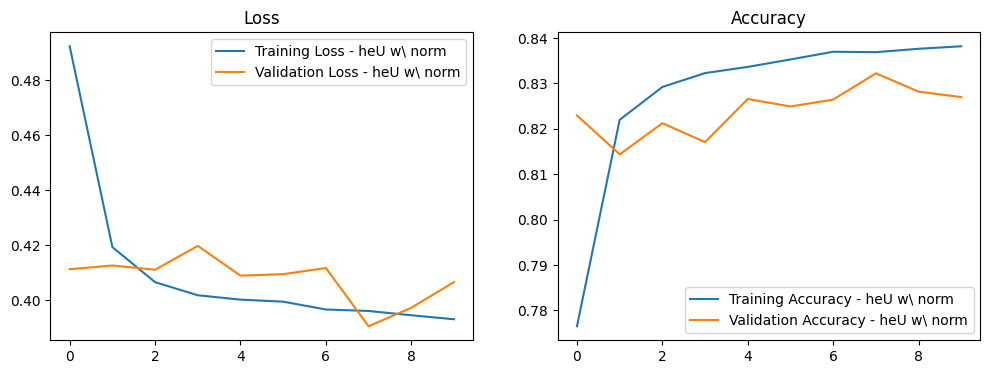

984/984 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


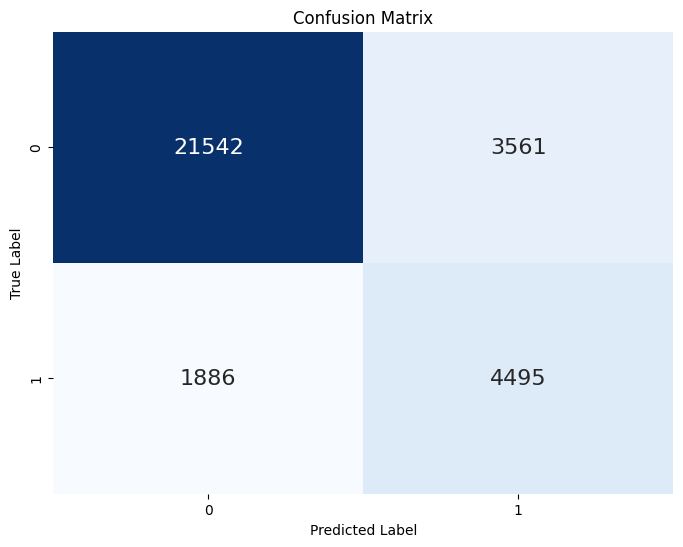

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.86      0.89     25103
           1       0.56      0.70      0.62      6381

    accuracy                           0.83     31484
   macro avg       0.74      0.78      0.76     31484
weighted avg       0.85      0.83      0.83     31484

ROC-AUC Score: 0.8672


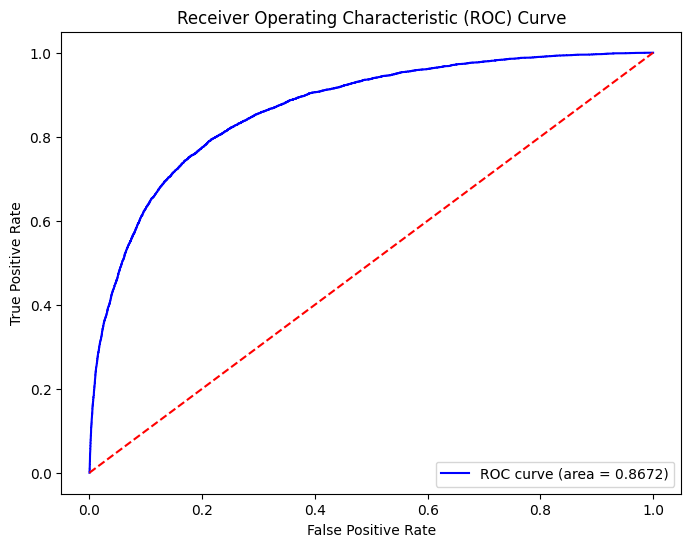

In [ ]:
from tensorflow.keras.initializers import GlorotNormal, HeNormal, RandomNormal, LecunNormal, GlorotUniform, HeUniform, RandomUniform, Zeros
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Define different initializers
initializer_glorotN = GlorotNormal()
initializer_heN = HeNormal()
initializer_randomN = RandomNormal()
initializer_lecunN = LecunNormal()
initializer_glorotU = GlorotUniform()
initializer_heU_full = HeUniform()
initializer_randomN = RandomUniform()
initializer_zeros = Zeros()


adam = Adam(learning_rate=0.001)

# Model definition with Glorot Normal Initialization
model_heU_full = Sequential([
    layers.Input(shape=(10,)),
    layers.Dense(256, activation='relu', kernel_initializer=initializer_heU_full),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu', kernel_initializer=initializer_heU_full),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu', kernel_initializer=initializer_heU_full),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu', kernel_initializer=initializer_heU_full),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(16, activation='relu', kernel_initializer=initializer_heU_full),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(8, activation='relu', kernel_initializer=initializer_heU_full),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(4, activation='relu', kernel_initializer=initializer_heU_full),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])


# Compile model
model_heU_full.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history_heU_full = model_heU_full.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=10)

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_heU_full.history['loss'], label='Training Loss - heU w\ norm')
plt.plot(history_heU_full.history['val_loss'], label='Validation Loss - heU w\ norm')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history_heU_full.history['accuracy'], label='Training Accuracy - heU w\ norm')
plt.plot(history_heU_full.history['val_accuracy'], label='Validation Accuracy - heU w\ norm')
plt.legend()
plt.title('Accuracy')

plt.show()

# eval
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc

# After predicting the values
y_pred_prob = model_heU_full.predict(X_test)
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

random u with dropout

Epoch 1/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 33s 5ms/step - accuracy: 0.5021 - loss: 0.6932 - val_accuracy: 0.7973 - val_loss: 0.6919
Epoch 2/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step - accuracy: 0.4989 - loss: 0.6932 - val_accuracy: 0.2027 - val_loss: 0.6971
Epoch 3/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 43s 5ms/step - accuracy: 0.4982 - loss: 0.6932 - val_accuracy: 0.7973 - val_loss: 0.6886
Epoch 4/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - accuracy: 0.5016 - loss: 0.6932 - val_accuracy: 0.2027 - val_loss: 0.6991
Epoch 5/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 40s 5ms/step - accuracy: 0.4986 - loss: 0.6932 - val_accuracy: 0.7973 - val_loss: 0.6901
Epoch 6/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step - accuracy: 0.5016 - loss: 0.6932 - val_accuracy: 0.7973 - val_loss: 0.6931
Epoch 7/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 32s 5ms/step - accuracy: 0.5005 - loss: 0.6932 - val_accuracy: 0.2027 - val_loss: 0.6974
Epoch 8/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 30s 5ms/step - accuracy: 0.5032 - loss: 0

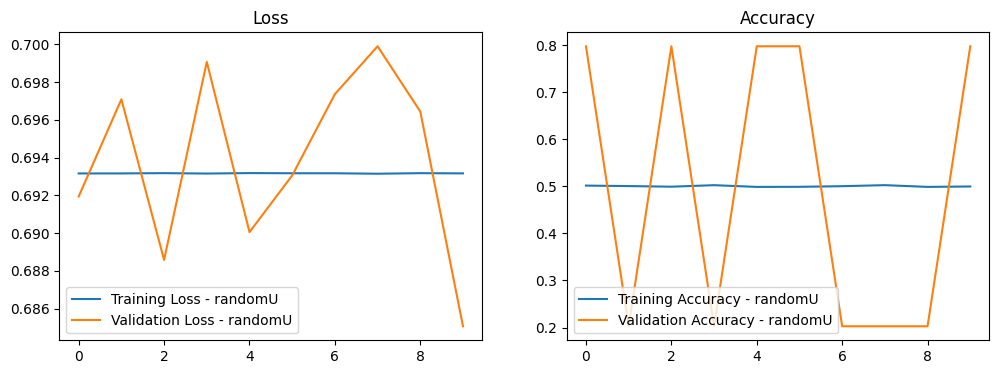

984/984 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


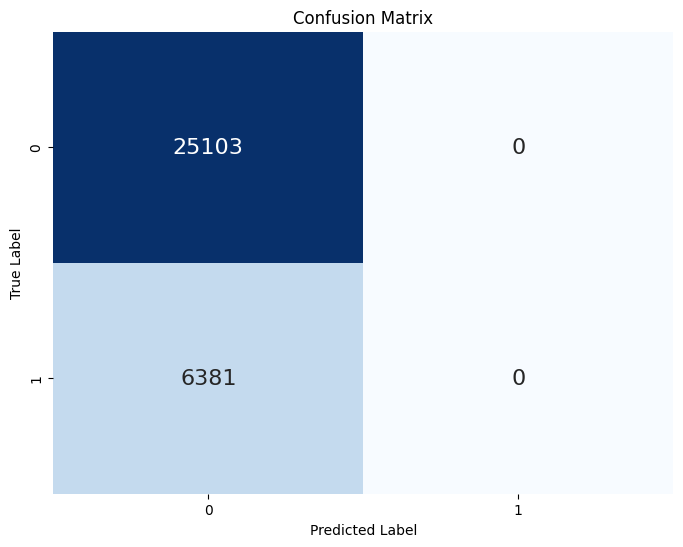

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89     25103
           1       0.00      0.00      0.00      6381

    accuracy                           0.80     31484
   macro avg       0.40      0.50      0.44     31484
weighted avg       0.64      0.80      0.71     31484

ROC-AUC Score: 0.5000


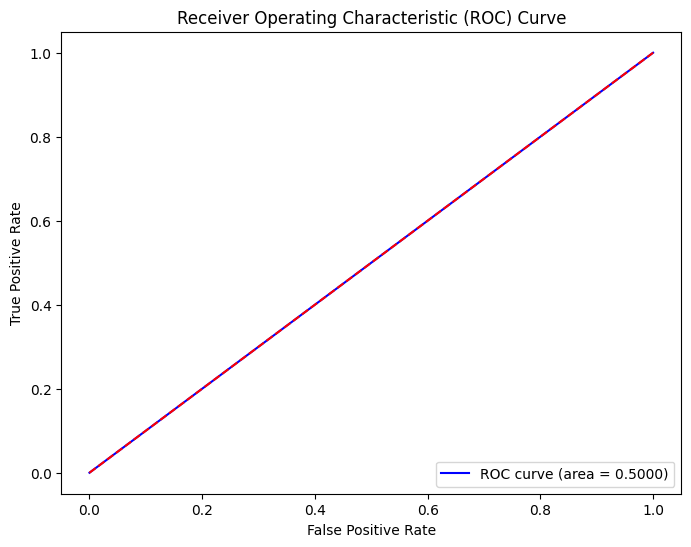

In [ ]:
from tensorflow.keras.initializers import GlorotNormal, HeNormal, RandomNormal, LecunNormal, GlorotUniform, HeUniform, RandomUniform, Zeros
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Define different initializers
initializer_glorotN = GlorotNormal()
initializer_heN = HeNormal()
initializer_randomN = RandomNormal()
initializer_lecunN = LecunNormal()
initializer_glorotU = GlorotUniform()
initializer_heU = HeUniform()
initializer_randomU = RandomUniform()
initializer_zeros = Zeros()


adam = Adam(learning_rate=0.001)

# Model definition with Glorot Normal Initialization
model_randomU = Sequential([
    layers.Input(shape=(10,)),
    layers.Dense(256, activation='relu', kernel_initializer=initializer_randomU),
    # layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu', kernel_initializer=initializer_randomU),
    # layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu', kernel_initializer=initializer_randomU),
    # layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu', kernel_initializer=initializer_randomU),
    # layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(16, activation='relu', kernel_initializer=initializer_randomU),
    # layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(8, activation='relu', kernel_initializer=initializer_randomU),
    # layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(4, activation='relu', kernel_initializer=initializer_randomU),
    # layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])


# Compile model
model_randomU.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history_randomU = model_randomU.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=10)

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_randomU.history['loss'], label='Training Loss - randomU')
plt.plot(history_randomU.history['val_loss'], label='Validation Loss - randomU')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history_randomU.history['accuracy'], label='Training Accuracy - randomU')
plt.plot(history_randomU.history['val_accuracy'], label='Validation Accuracy - randomU')
plt.legend()
plt.title('Accuracy')

plt.show()

# eval
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc

# After predicting the values
y_pred_prob = model_randomU.predict(X_test)
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

random u with dropout and batch normalize

Epoch 1/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - accuracy: 0.7833 - loss: 0.4814 - val_accuracy: 0.8165 - val_loss: 0.4327
Epoch 2/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.8259 - loss: 0.4110 - val_accuracy: 0.8153 - val_loss: 0.4171
Epoch 3/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - accuracy: 0.8305 - loss: 0.4052 - val_accuracy: 0.8049 - val_loss: 0.4237
Epoch 4/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8354 - loss: 0.4011 - val_accuracy: 0.8135 - val_loss: 0.4128
Epoch 5/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.8350 - loss: 0.3972 - val_accuracy: 0.8405 - val_loss: 0.3915
Epoch 6/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.8351 - loss: 0.3989 - val_accuracy: 0.8349 - val_loss: 0.3870
Epoch 7/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.8360 - loss: 0.3979 - val_accuracy: 0.8173 - val_loss: 0.3967
Epoch 8/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.8377 - loss: 0

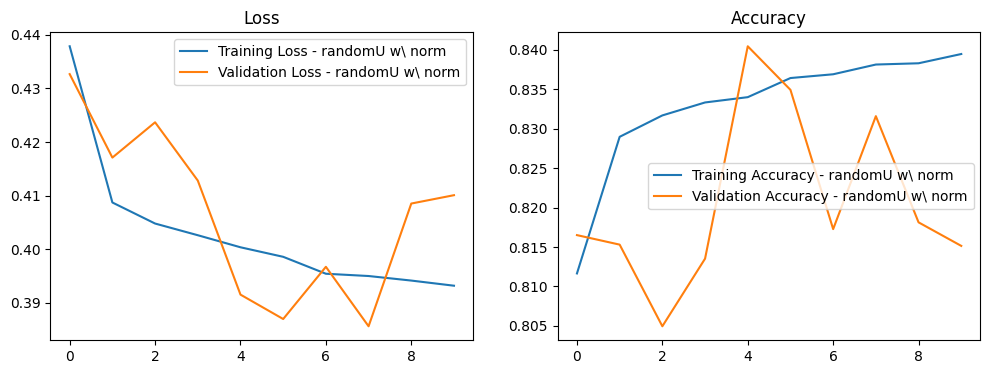

984/984 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


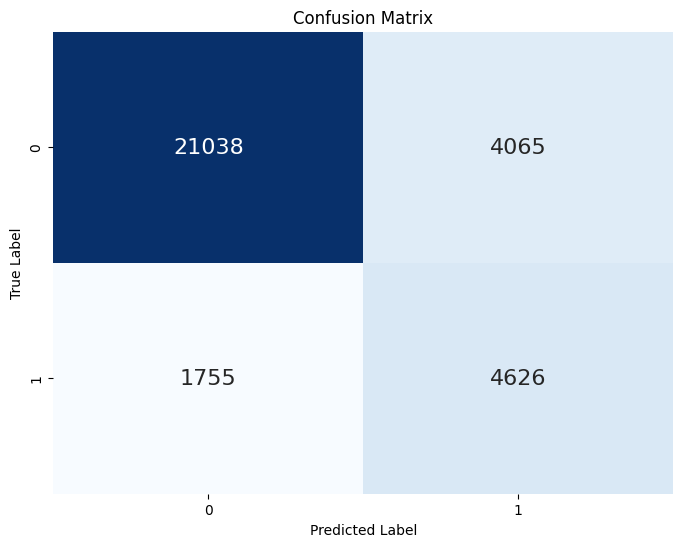

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.84      0.88     25103
           1       0.53      0.72      0.61      6381

    accuracy                           0.82     31484
   macro avg       0.73      0.78      0.75     31484
weighted avg       0.84      0.82      0.82     31484

ROC-AUC Score: 0.8650


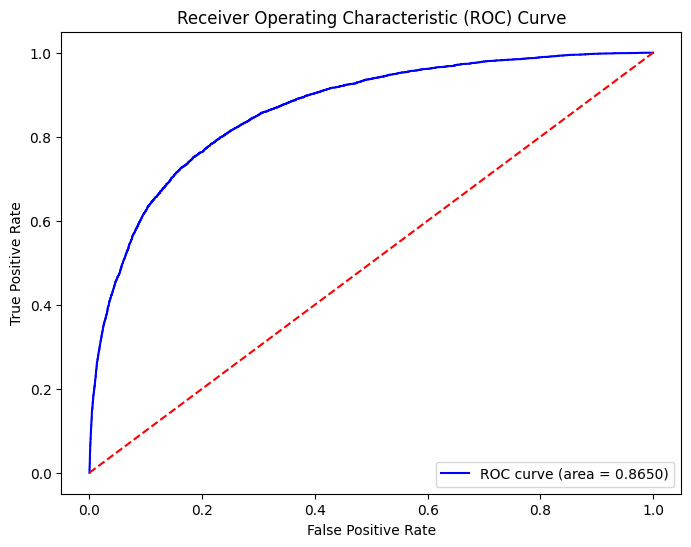

In [ ]:
from tensorflow.keras.initializers import GlorotNormal, HeNormal, RandomNormal, LecunNormal, GlorotUniform, HeUniform, RandomUniform, Zeros
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Define different initializers
initializer_glorotN = GlorotNormal()
initializer_heN = HeNormal()
initializer_randomN = RandomNormal()
initializer_lecunN = LecunNormal()
initializer_glorotU = GlorotUniform()
initializer_heU = HeUniform()
initializer_randomU_full = RandomUniform()
initializer_zeros = Zeros()


adam = Adam(learning_rate=0.001)

# Model definition with Glorot Normal Initialization
model_randomU_full = Sequential([
    layers.Input(shape=(10,)),
    layers.Dense(256, activation='relu', kernel_initializer=initializer_randomU_full),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu', kernel_initializer=initializer_randomU_full),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu', kernel_initializer=initializer_randomU_full),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu', kernel_initializer=initializer_randomU_full),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(16, activation='relu', kernel_initializer=initializer_randomU_full),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(8, activation='relu', kernel_initializer=initializer_randomU_full),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(4, activation='relu', kernel_initializer=initializer_randomU_full),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])


# Compile model
model_randomU_full.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history_randomU_full = model_randomU_full.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=10)

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_randomU_full.history['loss'], label='Training Loss - randomU w\ norm')
plt.plot(history_randomU_full.history['val_loss'], label='Validation Loss - randomU w\ norm')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history_randomU_full.history['accuracy'], label='Training Accuracy - randomU w\ norm')
plt.plot(history_randomU_full.history['val_accuracy'], label='Validation Accuracy - randomU w\ norm')
plt.legend()
plt.title('Accuracy')

plt.show()

# eval
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc

# After predicting the values
y_pred_prob = model_randomU_full.predict(X_test)
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

zeros with dropout

Epoch 1/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 37s 5ms/step - accuracy: 0.4995 - loss: 0.6932 - val_accuracy: 0.7973 - val_loss: 0.6916
Epoch 2/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.4986 - loss: 0.6932 - val_accuracy: 0.2027 - val_loss: 0.6933
Epoch 3/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.4973 - loss: 0.6932 - val_accuracy: 0.7973 - val_loss: 0.6908
Epoch 4/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.5000 - loss: 0.6932 - val_accuracy: 0.7973 - val_loss: 0.6901
Epoch 5/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.5007 - loss: 0.6932 - val_accuracy: 0.7973 - val_loss: 0.6837
Epoch 6/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.5013 - loss: 0.6932 - val_accuracy: 0.7973 - val_loss: 0.6915
Epoch 7/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.4981 - loss: 0.6932 - val_accuracy: 0.2027 - val_loss: 0.6989
Epoch 8/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.5002 - loss: 0

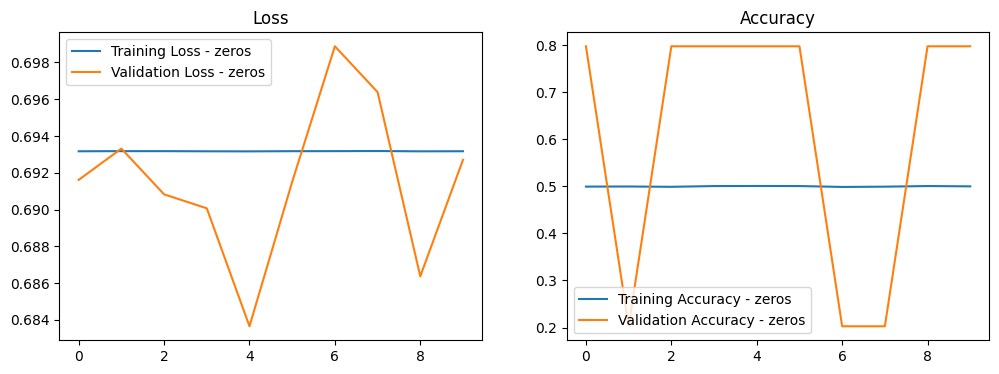

984/984 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


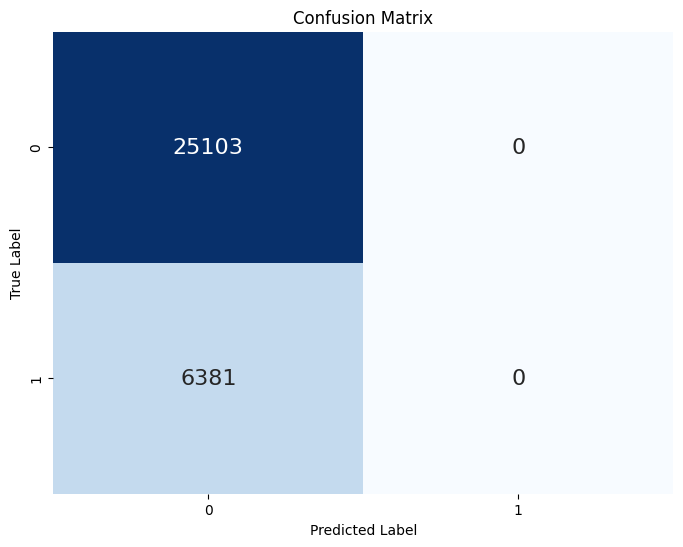

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89     25103
           1       0.00      0.00      0.00      6381

    accuracy                           0.80     31484
   macro avg       0.40      0.50      0.44     31484
weighted avg       0.64      0.80      0.71     31484

ROC-AUC Score: 0.5000


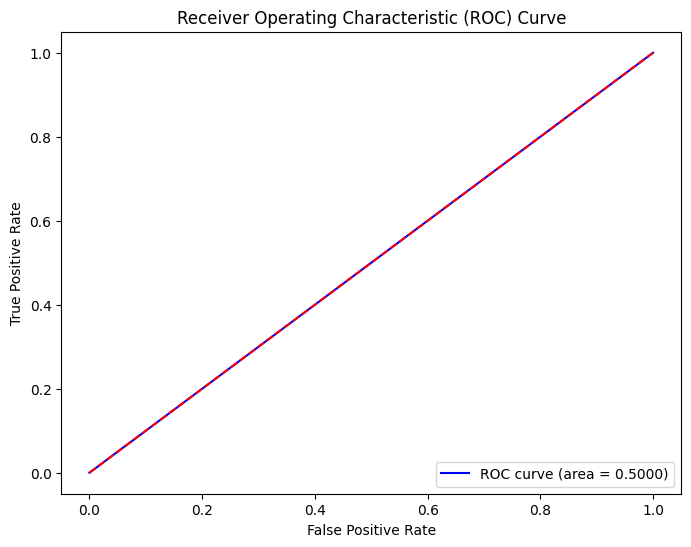

In [ ]:
from tensorflow.keras.initializers import GlorotNormal, HeNormal, RandomNormal, LecunNormal, GlorotUniform, HeUniform, RandomUniform, Zeros
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Define different initializers
initializer_glorotN = GlorotNormal()
initializer_heN = HeNormal()
initializer_randomN = RandomNormal()
initializer_lecunN = LecunNormal()
initializer_glorotU = GlorotUniform()
initializer_heU = HeUniform()
initializer_randomN = RandomUniform()
initializer_zeros = Zeros()


adam = Adam(learning_rate=0.001)

# Model definition with Glorot Normal Initialization
model_zeros = Sequential([
    layers.Input(shape=(10,)),
    layers.Dense(256, activation='relu', kernel_initializer=initializer_zeros),
    # layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu', kernel_initializer=initializer_zeros),
    # layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu', kernel_initializer=initializer_zeros),
    # layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu', kernel_initializer=initializer_zeros),
    # layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(16, activation='relu', kernel_initializer=initializer_zeros),
    # layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(8, activation='relu', kernel_initializer=initializer_zeros),
    # layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(4, activation='relu', kernel_initializer=initializer_zeros),
    # layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])


# Compile model
model_zeros.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history_zeros = model_zeros.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=10)

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_zeros.history['loss'], label='Training Loss - zeros')
plt.plot(history_zeros.history['val_loss'], label='Validation Loss - zeros')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history_zeros.history['accuracy'], label='Training Accuracy - zeros')
plt.plot(history_zeros.history['val_accuracy'], label='Validation Accuracy - zeros')
plt.legend()
plt.title('Accuracy')

plt.show()

# eval
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc

# After predicting the values
y_pred_prob = model_zeros.predict(X_test)
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

zeros with dropout and normalization

Epoch 1/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 36s 4ms/step - accuracy: 0.5012 - loss: 0.6932 - val_accuracy: 0.7973 - val_loss: 0.6893
Epoch 2/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 29s 3ms/step - accuracy: 0.5010 - loss: 0.6932 - val_accuracy: 0.7973 - val_loss: 0.6906
Epoch 3/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.5014 - loss: 0.6932 - val_accuracy: 0.7973 - val_loss: 0.6929
Epoch 4/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 42s 3ms/step - accuracy: 0.4964 - loss: 0.6932 - val_accuracy: 0.7973 - val_loss: 0.6883
Epoch 5/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.4989 - loss: 0.6932 - val_accuracy: 0.2027 - val_loss: 0.6951
Epoch 6/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.4997 - loss: 0.6932 - val_accuracy: 0.2027 - val_loss: 0.6958
Epoch 7/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.5006 - loss: 0.6932 - val_accuracy: 0.7973 - val_loss: 0.6924
Epoch 8/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.5010 - loss: 0

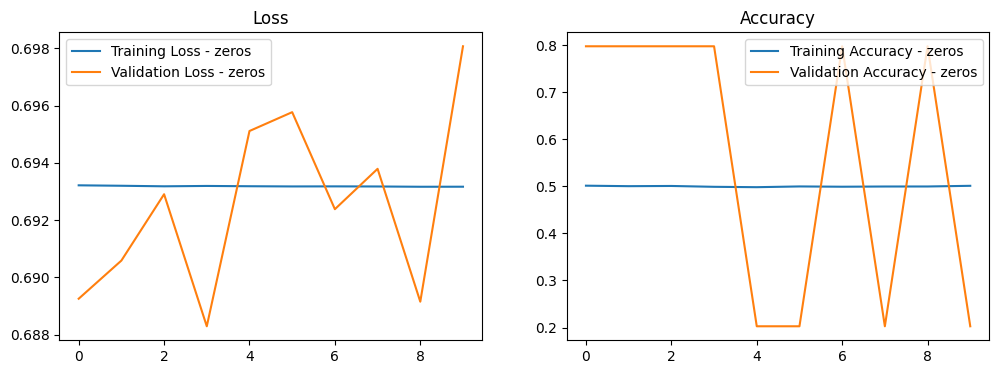

984/984 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


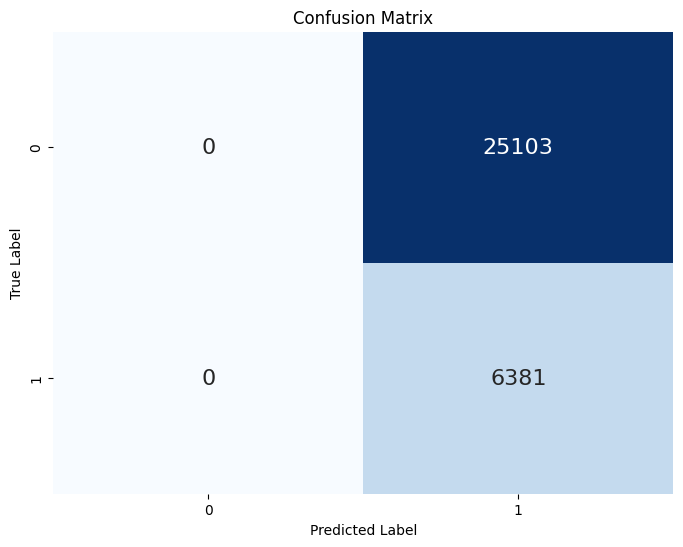

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     25103
           1       0.20      1.00      0.34      6381

    accuracy                           0.20     31484
   macro avg       0.10      0.50      0.17     31484
weighted avg       0.04      0.20      0.07     31484

ROC-AUC Score: 0.5000


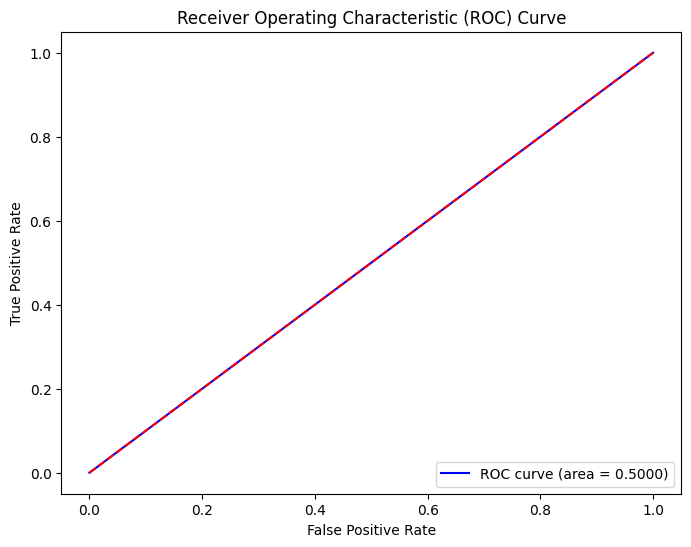

In [ ]:
from tensorflow.keras.initializers import GlorotNormal, HeNormal, RandomNormal, LecunNormal, GlorotUniform, HeUniform, RandomUniform, Zeros
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Define different initializers
initializer_glorotN = GlorotNormal()
initializer_heN = HeNormal()
initializer_randomN = RandomNormal()
initializer_lecunN = LecunNormal()
initializer_glorotU = GlorotUniform()
initializer_heU = HeUniform()
initializer_randomN = RandomUniform()
initializer_zeros_norm = Zeros()


adam = Adam(learning_rate=0.001)

# Model definition with Glorot Normal Initialization
model_zeros_full = Sequential([
    layers.Input(shape=(10,)),
    layers.Dense(256, activation='relu', kernel_initializer=initializer_zeros_norm),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu', kernel_initializer=initializer_zeros_norm),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu', kernel_initializer=initializer_zeros_norm),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu', kernel_initializer=initializer_zeros_norm),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(16, activation='relu', kernel_initializer=initializer_zeros_norm),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(8, activation='relu', kernel_initializer=initializer_zeros_norm),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(4, activation='relu', kernel_initializer=initializer_zeros_norm),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])


# Compile model
model_zeros_full.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history_zeros_full = model_zeros_full.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=10)

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_zeros_full.history['loss'], label='Training Loss - zeros')
plt.plot(history_zeros_full.history['val_loss'], label='Validation Loss - zeros')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history_zeros_full.history['accuracy'], label='Training Accuracy - zeros')
plt.plot(history_zeros_full.history['val_accuracy'], label='Validation Accuracy - zeros')
plt.legend()
plt.title('Accuracy')

plt.show()

# eval
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc

# After predicting the values
y_pred_prob = model_zeros_full.predict(X_test)
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

glorut with normalization only

Epoch 1/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 29s 4ms/step - accuracy: 0.8211 - loss: 0.4069 - val_accuracy: 0.8041 - val_loss: 0.4388
Epoch 2/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 35s 3ms/step - accuracy: 0.8451 - loss: 0.3619 - val_accuracy: 0.8132 - val_loss: 0.4260
Epoch 3/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.8504 - loss: 0.3540 - val_accuracy: 0.8142 - val_loss: 0.4352
Epoch 4/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.8497 - loss: 0.3531 - val_accuracy: 0.8131 - val_loss: 0.4090
Epoch 5/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8517 - loss: 0.3491 - val_accuracy: 0.8208 - val_loss: 0.4097
Epoch 6/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.8530 - loss: 0.3464 - val_accuracy: 0.8245 - val_loss: 0.3866
Epoch 7/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8536 - loss: 0.3458 - val_accuracy: 0.8169 - val_loss: 0.4014
Epoch 8/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8531 - loss: 0

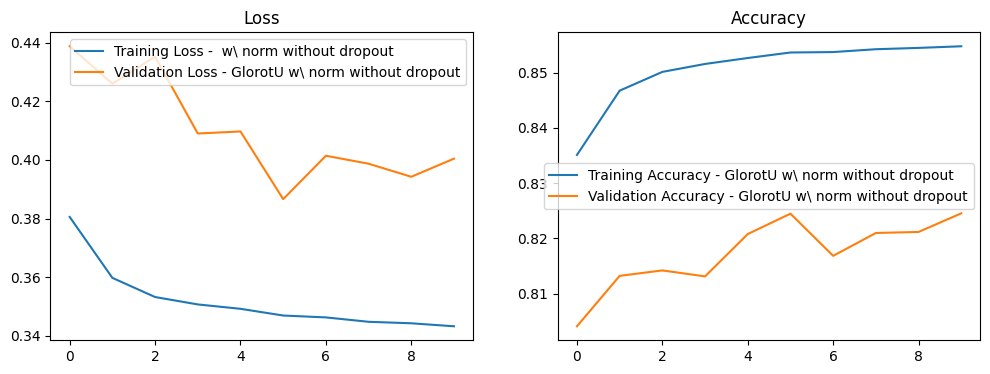

984/984 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


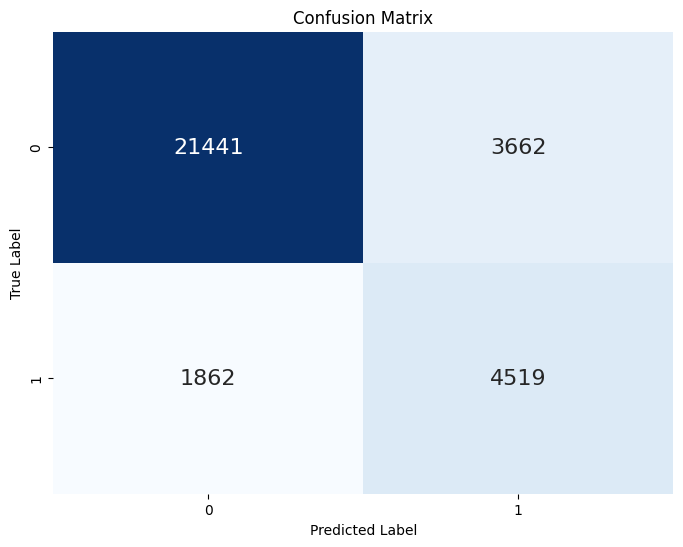

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.85      0.89     25103
           1       0.55      0.71      0.62      6381

    accuracy                           0.82     31484
   macro avg       0.74      0.78      0.75     31484
weighted avg       0.85      0.82      0.83     31484

ROC-AUC Score: 0.8686


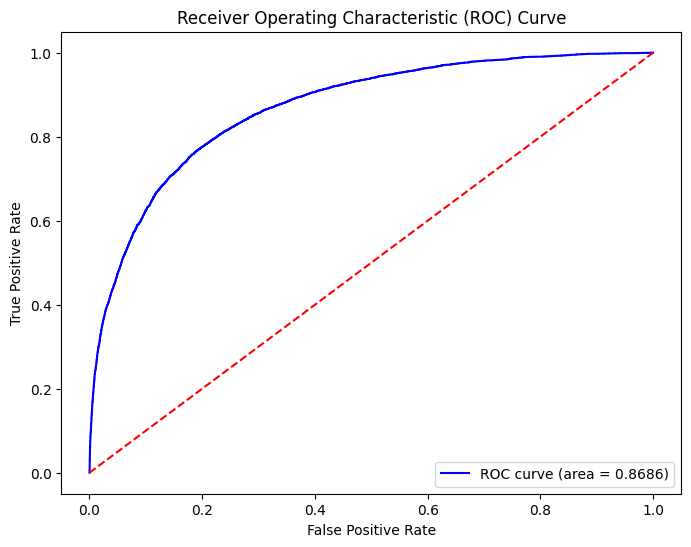

In [ ]:
from tensorflow.keras.initializers import GlorotNormal, HeNormal, RandomNormal, LecunNormal, GlorotUniform, HeUniform, RandomUniform, Zeros
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Define different initializers
initializer_glorotN = GlorotNormal()
initializer_heN = HeNormal()
initializer_randomN = RandomNormal()
initializer_lecunN = LecunNormal()
initializer_glorotU = GlorotUniform()
initializer_heU = HeUniform()
initializer_randomN = RandomUniform()
initializer_zeros = Zeros()


adam = Adam(learning_rate=0.001)

# Model definition with Glorot Normal Initialization
model_glorotU_norm = Sequential([
    layers.Input(shape=(10,)),
    layers.Dense(256, activation='relu', kernel_initializer=initializer_glorotU),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu', kernel_initializer=initializer_glorotU),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu', kernel_initializer=initializer_glorotU),
    layers.BatchNormalization(),
    layers.Dense(32, activation='relu', kernel_initializer=initializer_glorotU),
    layers.BatchNormalization(),
    layers.Dense(16, activation='relu', kernel_initializer=initializer_glorotU),
    layers.BatchNormalization(),
    layers.Dense(8, activation='relu', kernel_initializer=initializer_glorotU),
    layers.BatchNormalization(),
    layers.Dense(4, activation='relu', kernel_initializer=initializer_glorotU),
    layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid')
])


# Compile model
model_glorotU_norm.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history_glorotU_norm = model_glorotU_norm.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=10)

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_glorotU_norm.history['loss'], label='Training Loss -  w\ norm without dropout')
plt.plot(history_glorotU_norm.history['val_loss'], label='Validation Loss - GlorotU w\ norm without dropout')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history_glorotU_norm.history['accuracy'], label='Training Accuracy - GlorotU w\ norm without dropout')
plt.plot(history_glorotU_norm.history['val_accuracy'], label='Validation Accuracy - GlorotU w\ norm without dropout')
plt.legend()
plt.title('Accuracy')

plt.show()

# eval
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc

# After predicting the values
y_pred_prob = model_glorotU_norm.predict(X_test)
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

he U with normalization only

Epoch 1/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 29s 4ms/step - accuracy: 0.8229 - loss: 0.4029 - val_accuracy: 0.8258 - val_loss: 0.3956
Epoch 2/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.8455 - loss: 0.3600 - val_accuracy: 0.8305 - val_loss: 0.3852
Epoch 3/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 23s 3ms/step - accuracy: 0.8499 - loss: 0.3526 - val_accuracy: 0.8175 - val_loss: 0.4055
Epoch 4/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 40s 3ms/step - accuracy: 0.8534 - loss: 0.3463 - val_accuracy: 0.8166 - val_loss: 0.4068
Epoch 5/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8533 - loss: 0.3470 - val_accuracy: 0.8194 - val_loss: 0.4071
Epoch 6/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.8539 - loss: 0.3448 - val_accuracy: 0.8206 - val_loss: 0.3951
Epoch 7/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8554 - loss: 0.3436 - val_accuracy: 0.8322 - val_loss: 0.3904
Epoch 8/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8548 - loss: 0

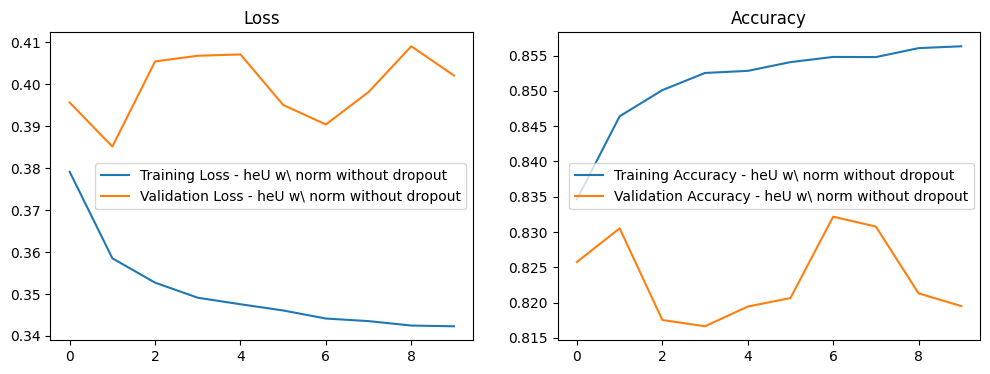

984/984 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step


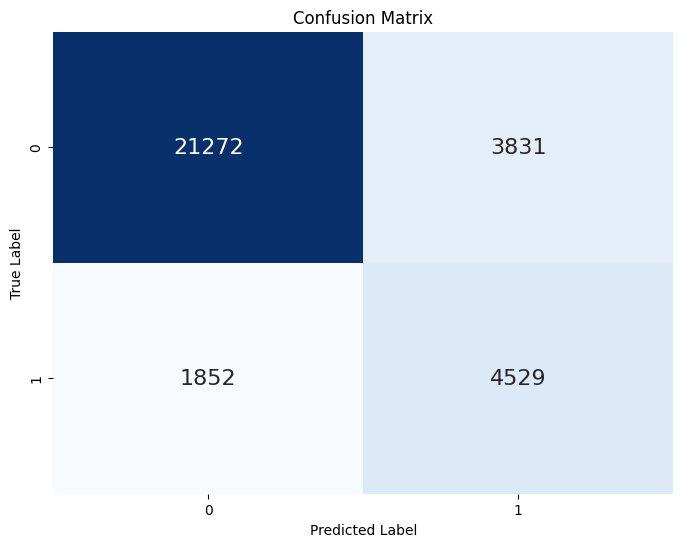

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.85      0.88     25103
           1       0.54      0.71      0.61      6381

    accuracy                           0.82     31484
   macro avg       0.73      0.78      0.75     31484
weighted avg       0.84      0.82      0.83     31484

ROC-AUC Score: 0.8643


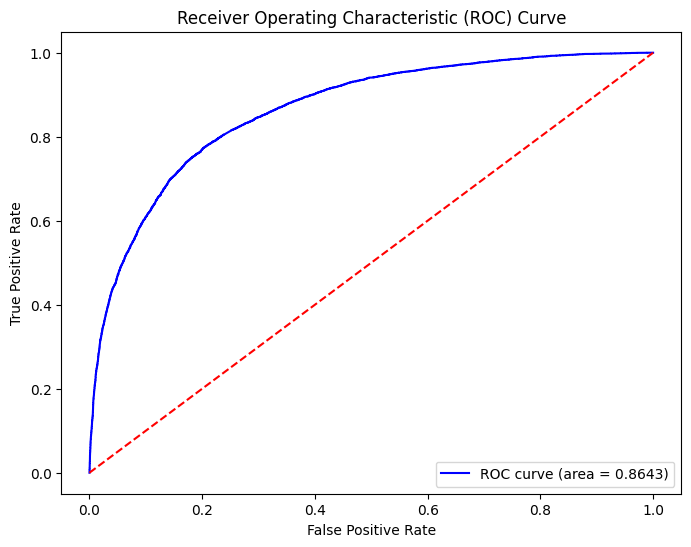

In [ ]:
from tensorflow.keras.initializers import GlorotNormal, HeNormal, RandomNormal, LecunNormal, GlorotUniform, HeUniform, RandomUniform, Zeros
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Define different initializers
initializer_glorotN = GlorotNormal()
initializer_heN = HeNormal()
initializer_randomN = RandomNormal()
initializer_lecunN = LecunNormal()
initializer_glorotU = GlorotUniform()
initializer_heU_norm = HeUniform()
initializer_randomN = RandomUniform()
initializer_zeros = Zeros()


adam = Adam(learning_rate=0.001)

# Model definition with Glorot Normal Initialization
model_heU_norm = Sequential([
    layers.Input(shape=(10,)),
    layers.Dense(256, activation='relu', kernel_initializer=initializer_heU_norm),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu', kernel_initializer=initializer_heU_norm),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu', kernel_initializer=initializer_heU_norm),
    layers.BatchNormalization(),
    layers.Dense(32, activation='relu', kernel_initializer=initializer_heU_norm),
    layers.BatchNormalization(),
    layers.Dense(16, activation='relu', kernel_initializer=initializer_heU_norm),
    layers.BatchNormalization(),
    layers.Dense(8, activation='relu', kernel_initializer=initializer_heU_norm),
    layers.BatchNormalization(),
    layers.Dense(4, activation='relu', kernel_initializer=initializer_heU_norm),
    layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid')
])


# Compile model
model_heU_norm.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history_heU_norm = model_heU_norm.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=10)

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_heU_norm.history['loss'], label='Training Loss - heU w\ norm without dropout')
plt.plot(history_heU_norm.history['val_loss'], label='Validation Loss - heU w\ norm without dropout')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history_heU_norm.history['accuracy'], label='Training Accuracy - heU w\ norm without dropout')
plt.plot(history_heU_norm.history['val_accuracy'], label='Validation Accuracy - heU w\ norm without dropout')
plt.legend()
plt.title('Accuracy')

plt.show()

# eval
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc

# After predicting the values
y_pred_prob = model_heU_norm.predict(X_test)
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

random u with normalization only

Epoch 1/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 28s 4ms/step - accuracy: 0.8227 - loss: 0.3949 - val_accuracy: 0.8113 - val_loss: 0.4137
Epoch 2/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 35s 3ms/step - accuracy: 0.8415 - loss: 0.3651 - val_accuracy: 0.8204 - val_loss: 0.4280
Epoch 3/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8464 - loss: 0.3594 - val_accuracy: 0.8317 - val_loss: 0.3913
Epoch 4/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8523 - loss: 0.3501 - val_accuracy: 0.8328 - val_loss: 0.3937
Epoch 5/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8533 - loss: 0.3481 - val_accuracy: 0.8170 - val_loss: 0.4157
Epoch 6/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8538 - loss: 0.3471 - val_accuracy: 0.8258 - val_loss: 0.3939
Epoch 7/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.8558 - loss: 0.3439 - val_accuracy: 0.8270 - val_loss: 0.4040
Epoch 8/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8540 - loss: 0

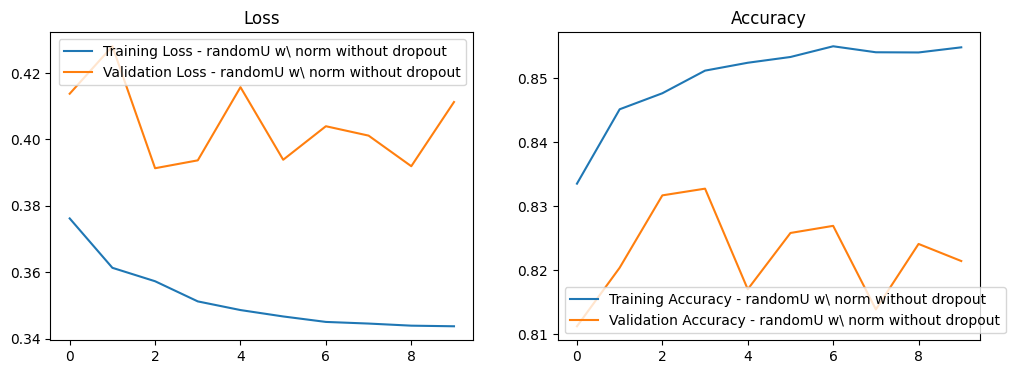

984/984 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


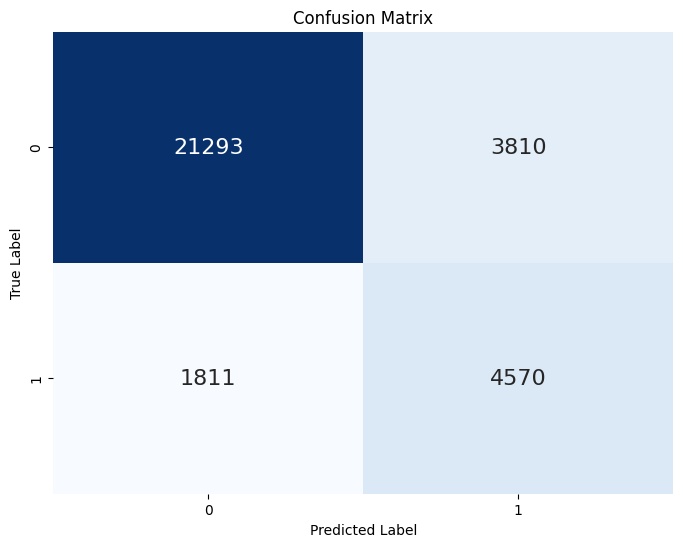

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.85      0.88     25103
           1       0.55      0.72      0.62      6381

    accuracy                           0.82     31484
   macro avg       0.73      0.78      0.75     31484
weighted avg       0.85      0.82      0.83     31484

ROC-AUC Score: 0.8675


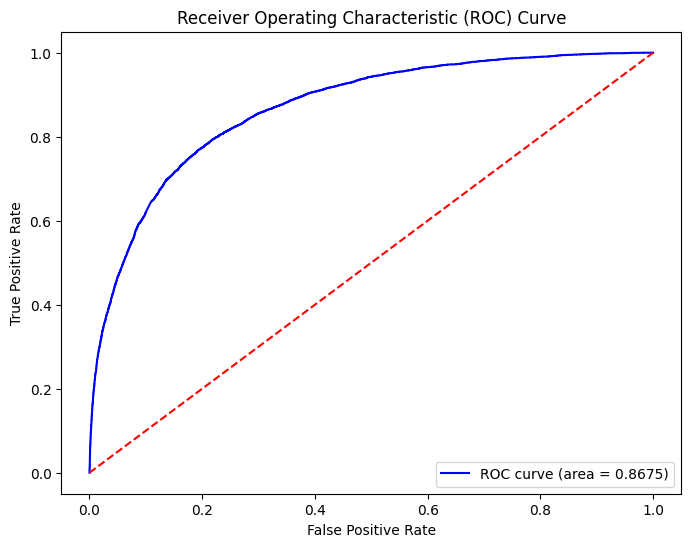

In [ ]:
from tensorflow.keras.initializers import GlorotNormal, HeNormal, RandomNormal, LecunNormal, GlorotUniform, HeUniform, RandomUniform, Zeros
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Define different initializers
initializer_glorotN = GlorotNormal()
initializer_heN = HeNormal()
initializer_randomN = RandomNormal()
initializer_lecunN = LecunNormal()
initializer_glorotU = GlorotUniform()
initializer_heU = HeUniform()
initializer_randomU_norm = RandomUniform()
initializer_zeros = Zeros()


adam = Adam(learning_rate=0.001)

# Model definition with Glorot Normal Initialization
model_randomU_norm = Sequential([
    layers.Input(shape=(10,)),
    layers.Dense(256, activation='relu', kernel_initializer=initializer_randomU_norm),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu', kernel_initializer=initializer_randomU_norm),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu', kernel_initializer=initializer_randomU_norm),
    layers.BatchNormalization(),
    layers.Dense(32, activation='relu', kernel_initializer=initializer_randomU_norm),
    layers.BatchNormalization(),
    layers.Dense(16, activation='relu', kernel_initializer=initializer_randomU_norm),
    layers.BatchNormalization(),
    layers.Dense(8, activation='relu', kernel_initializer=initializer_randomU_norm),
    layers.BatchNormalization(),
    layers.Dense(4, activation='relu', kernel_initializer=initializer_randomU_norm),
    layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid')
])


# Compile model
model_randomU_norm.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history_randomU_norm = model_randomU_norm.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=10)

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_randomU_norm.history['loss'], label='Training Loss - randomU w\ norm without dropout')
plt.plot(history_randomU_norm.history['val_loss'], label='Validation Loss - randomU w\ norm without dropout')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history_randomU_norm.history['accuracy'], label='Training Accuracy - randomU w\ norm without dropout')
plt.plot(history_randomU_norm.history['val_accuracy'], label='Validation Accuracy - randomU w\ norm without dropout')
plt.legend()
plt.title('Accuracy')

plt.show()

# eval
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc

# After predicting the values
y_pred_prob = model_randomU_norm.predict(X_test)
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

zeros with normalization only

Epoch 1/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - accuracy: 0.4979 - loss: 0.6932 - val_accuracy: 0.7973 - val_loss: 0.6836
Epoch 2/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 36s 3ms/step - accuracy: 0.4978 - loss: 0.6932 - val_accuracy: 0.2027 - val_loss: 0.6963
Epoch 3/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.4983 - loss: 0.6932 - val_accuracy: 0.7973 - val_loss: 0.6911
Epoch 4/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.5023 - loss: 0.6932 - val_accuracy: 0.2027 - val_loss: 0.6937
Epoch 5/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.4994 - loss: 0.6932 - val_accuracy: 0.7973 - val_loss: 0.6917
Epoch 6/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.4997 - loss: 0.6932 - val_accuracy: 0.7973 - val_loss: 0.6887
Epoch 7/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.4996 - loss: 0.6932 - val_accuracy: 0.2027 - val_loss: 0.6941
Epoch 8/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.4985 - loss: 0

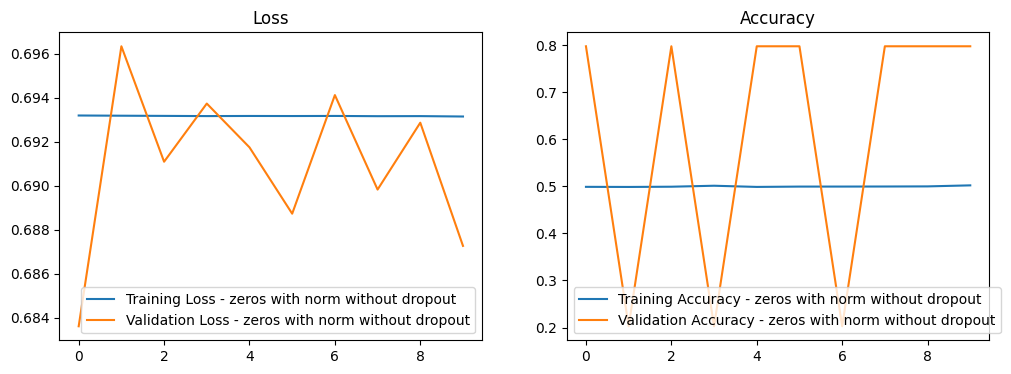

984/984 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


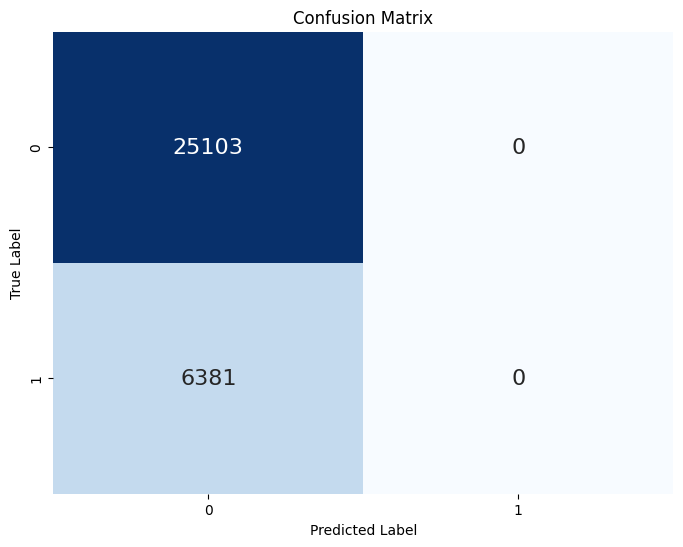

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89     25103
           1       0.00      0.00      0.00      6381

    accuracy                           0.80     31484
   macro avg       0.40      0.50      0.44     31484
weighted avg       0.64      0.80      0.71     31484

ROC-AUC Score: 0.5000


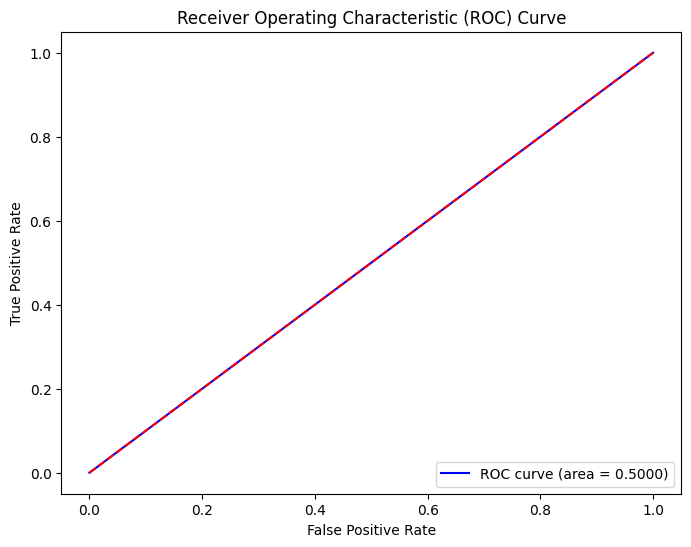

In [ ]:
from tensorflow.keras.initializers import GlorotNormal, HeNormal, RandomNormal, LecunNormal, GlorotUniform, HeUniform, RandomUniform, Zeros
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Define different initializers
initializer_glorotN = GlorotNormal()
initializer_heN = HeNormal()
initializer_randomN = RandomNormal()
initializer_lecunN = LecunNormal()
initializer_glorotU = GlorotUniform()
initializer_heU = HeUniform()
initializer_randomN = RandomUniform()
initializer_zeros_norm = Zeros()


adam = Adam(learning_rate=0.001)

# Model definition with Glorot Normal Initialization
model_zeros_norm = Sequential([
    layers.Input(shape=(10,)),
    layers.Dense(256, activation='relu', kernel_initializer=initializer_zeros_norm),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu', kernel_initializer=initializer_zeros_norm),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu', kernel_initializer=initializer_zeros_norm),
    layers.BatchNormalization(),
    layers.Dense(32, activation='relu', kernel_initializer=initializer_zeros_norm),
    layers.BatchNormalization(),
    layers.Dense(16, activation='relu', kernel_initializer=initializer_zeros_norm),
    layers.BatchNormalization(),
    layers.Dense(8, activation='relu', kernel_initializer=initializer_zeros_norm),
    layers.BatchNormalization(),
    layers.Dense(4, activation='relu', kernel_initializer=initializer_zeros_norm),
    layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid')
])


# Compile model
model_zeros_norm.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history_zeros_norm = model_zeros_norm.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=10)

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_zeros_norm.history['loss'], label='Training Loss - zeros with norm without dropout')
plt.plot(history_zeros_norm.history['val_loss'], label='Validation Loss - zeros with norm without dropout')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history_zeros_norm.history['accuracy'], label='Training Accuracy - zeros with norm without dropout')
plt.plot(history_zeros_norm.history['val_accuracy'], label='Validation Accuracy - zeros with norm without dropout')
plt.legend()
plt.title('Accuracy')

plt.show()

# eval
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc

# After predicting the values
y_pred_prob = model_zeros_norm.predict(X_test)
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Epoch 1/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - accuracy: 0.8363 - loss: 0.3795 - val_accuracy: 0.8340 - val_loss: 0.3770
Epoch 2/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - accuracy: 0.8544 - loss: 0.3413 - val_accuracy: 0.8187 - val_loss: 0.4112
Epoch 3/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.8554 - loss: 0.3384 - val_accuracy: 0.8209 - val_loss: 0.4300
Epoch 4/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.8558 - loss: 0.3375 - val_accuracy: 0.8246 - val_loss: 0.4038
Epoch 5/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.8561 - loss: 0.3365 - val_accuracy: 0.8228 - val_loss: 0.4026
Epoch 6/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.8558 - loss: 0.3367 - val_accuracy: 0.8256 - val_loss: 0.3922
Epoch 7/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.8572 - loss: 0.3333 - val_accuracy: 0.8350 - val_loss: 0.3901
Epoch 8/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step - accuracy: 0.8570 - loss: 0

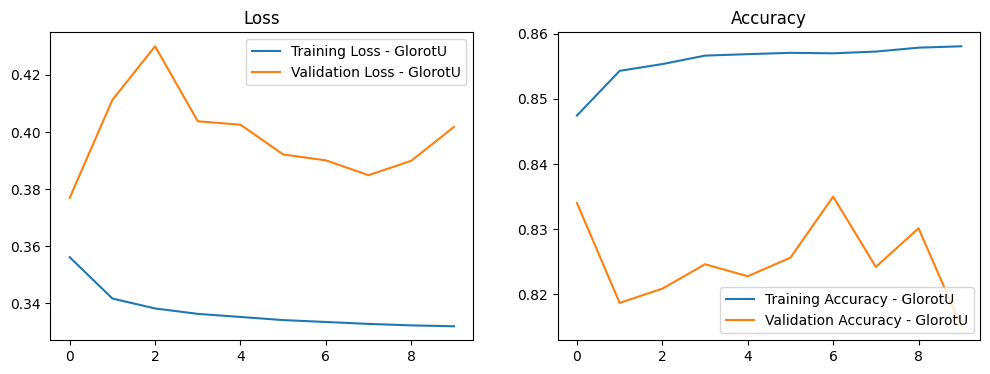

984/984 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


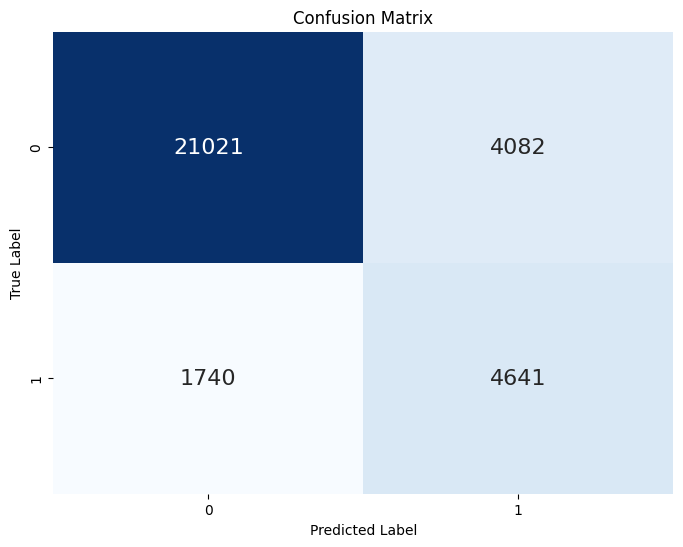

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.84      0.88     25103
           1       0.53      0.73      0.61      6381

    accuracy                           0.82     31484
   macro avg       0.73      0.78      0.75     31484
weighted avg       0.84      0.82      0.82     31484

ROC-AUC Score: 0.8682


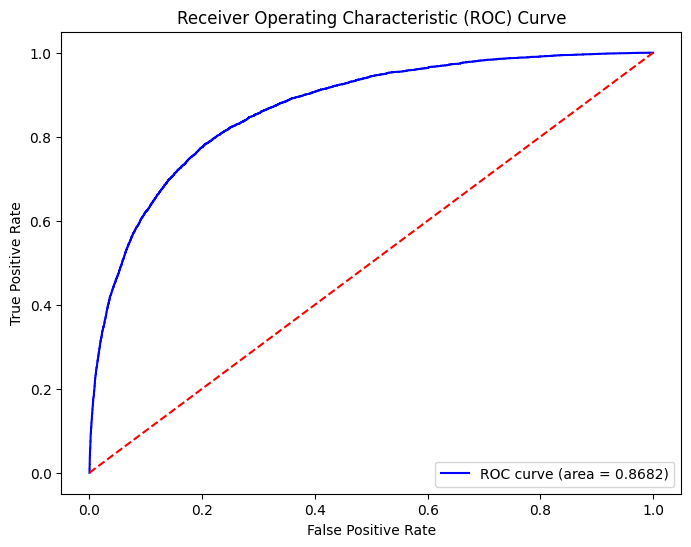

In [ ]:
from tensorflow.keras.initializers import GlorotNormal, HeNormal, RandomNormal, LecunNormal, GlorotUniform, HeUniform, RandomUniform, Zeros
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Define different initializers
initializer_glorotN = GlorotNormal()
initializer_heN = HeNormal()
initializer_randomN = RandomNormal()
initializer_lecunN = LecunNormal()
initializer_glorotU_only = GlorotUniform()
initializer_heU = HeUniform()
initializer_randomN = RandomUniform()
initializer_zeros = Zeros()


adam = Adam(learning_rate=0.001)

# Model definition with Glorot Normal Initialization
model_glorotU_only = Sequential([
    layers.Input(shape=(10,)),
    layers.Dense(256, activation='relu', kernel_initializer=initializer_glorotU_only),
    layers.Dense(128, activation='relu', kernel_initializer=initializer_glorotU_only),
    layers.Dense(64, activation='relu', kernel_initializer=initializer_glorotU_only),
    layers.Dense(32, activation='relu', kernel_initializer=initializer_glorotU_only),
    layers.Dense(16, activation='relu', kernel_initializer=initializer_glorotU_only),
    layers.Dense(8, activation='relu', kernel_initializer=initializer_glorotU_only),
    layers.Dense(4, activation='relu', kernel_initializer=initializer_glorotU_only),
    layers.Dense(1, activation='sigmoid')
])


# Compile model
model_glorotU_only.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history_glorotU_only = model_glorotU_only.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=10)

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_glorotU_only.history['loss'], label='Training Loss - GlorotU')
plt.plot(history_glorotU_only.history['val_loss'], label='Validation Loss - GlorotU')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history_glorotU_only.history['accuracy'], label='Training Accuracy - GlorotU')
plt.plot(history_glorotU_only.history['val_accuracy'], label='Validation Accuracy - GlorotU')
plt.legend()
plt.title('Accuracy')

plt.show()
# eval
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc

# After predicting the values
y_pred_prob = model_glorotU_only.predict(X_test)
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Epoch 1/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.8314 - loss: 0.3844 - val_accuracy: 0.8162 - val_loss: 0.4171
Epoch 2/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.8538 - loss: 0.3413 - val_accuracy: 0.8229 - val_loss: 0.4006
Epoch 3/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8569 - loss: 0.3359 - val_accuracy: 0.8310 - val_loss: 0.3784
Epoch 4/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8566 - loss: 0.3334 - val_accuracy: 0.8207 - val_loss: 0.3970
Epoch 5/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.8569 - loss: 0.3351 - val_accuracy: 0.8188 - val_loss: 0.4231
Epoch 6/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.8560 - loss: 0.3358 - val_accuracy: 0.8147 - val_loss: 0.4244
Epoch 7/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.8594 - loss: 0.3308 - val_accuracy: 0.8309 - val_loss: 0.3883
Epoch 8/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.8580 - loss: 0

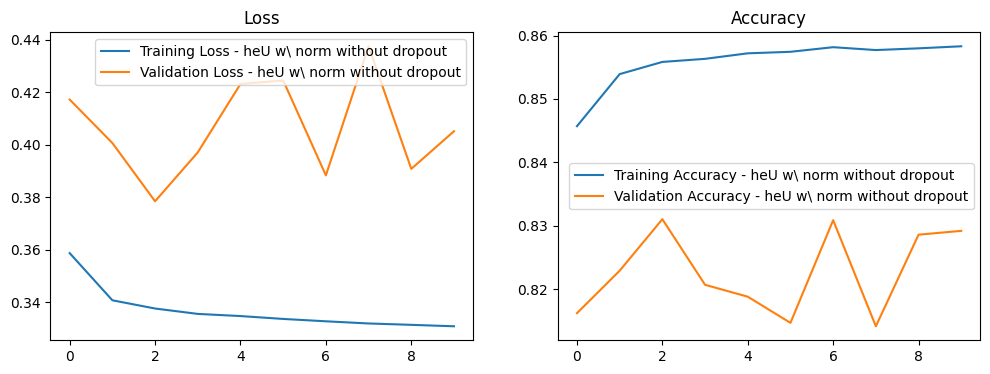

984/984 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


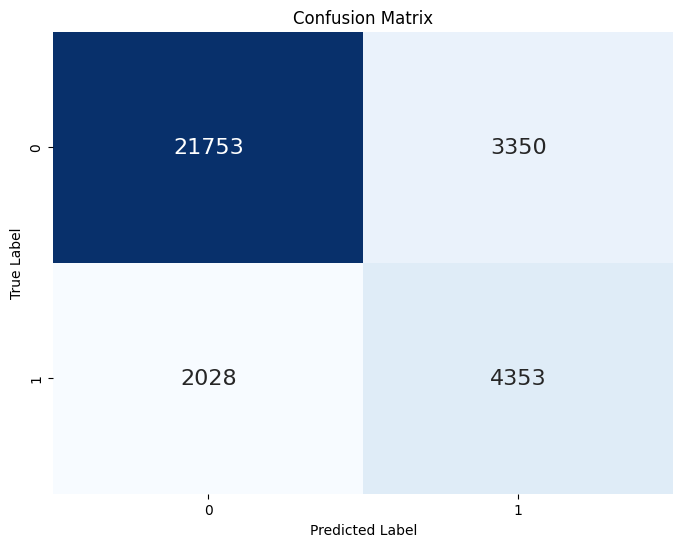

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.87      0.89     25103
           1       0.57      0.68      0.62      6381

    accuracy                           0.83     31484
   macro avg       0.74      0.77      0.75     31484
weighted avg       0.84      0.83      0.83     31484

ROC-AUC Score: 0.8651


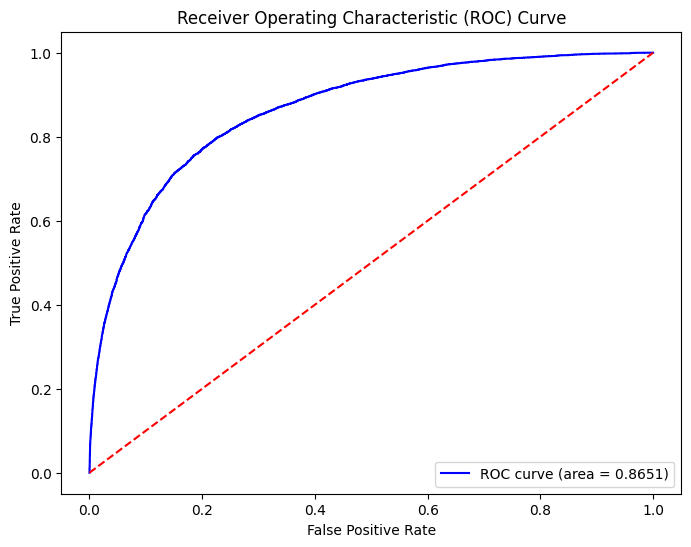

In [ ]:
from tensorflow.keras.initializers import GlorotNormal, HeNormal, RandomNormal, LecunNormal, GlorotUniform, HeUniform, RandomUniform, Zeros
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Define different initializers
initializer_glorotN = GlorotNormal()
initializer_heN = HeNormal()
initializer_randomN = RandomNormal()
initializer_lecunN = LecunNormal()
initializer_glorotU = GlorotUniform()
initializer_heU_norm_only = HeUniform()
initializer_randomN = RandomUniform()
initializer_zeros = Zeros()


adam = Adam(learning_rate=0.001)

# Model definition with Glorot Normal Initialization
model_heU_norm_only = Sequential([
    layers.Input(shape=(10,)),
    layers.Dense(256, activation='relu', kernel_initializer=initializer_heU_norm_only),
    layers.Dense(128, activation='relu', kernel_initializer=initializer_heU_norm_only),
    layers.Dense(64, activation='relu', kernel_initializer=initializer_heU_norm_only),
    layers.Dense(32, activation='relu', kernel_initializer=initializer_heU_norm_only),
    layers.Dense(16, activation='relu', kernel_initializer=initializer_heU_norm_only),
    layers.Dense(8, activation='relu', kernel_initializer=initializer_heU_norm_only),
    layers.Dense(4, activation='relu', kernel_initializer=initializer_heU_norm_only),
    layers.Dense(1, activation='sigmoid')
])


# Compile model
model_heU_norm_only.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history_heU_norm_only = model_heU_norm_only.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=10)

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_heU_norm_only.history['loss'], label='Training Loss - heU w\ norm without dropout')
plt.plot(history_heU_norm_only.history['val_loss'], label='Validation Loss - heU w\ norm without dropout')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history_heU_norm_only.history['accuracy'], label='Training Accuracy - heU w\ norm without dropout')
plt.plot(history_heU_norm_only.history['val_accuracy'], label='Validation Accuracy - heU w\ norm without dropout')
plt.legend()
plt.title('Accuracy')

plt.show()

# eval
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc

# After predicting the values
y_pred_prob = model_heU_norm_only.predict(X_test)
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Epoch 1/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 25s 3ms/step - accuracy: 0.5025 - loss: 0.6932 - val_accuracy: 0.7973 - val_loss: 0.6889
Epoch 2/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.4990 - loss: 0.6932 - val_accuracy: 0.7973 - val_loss: 0.6866
Epoch 3/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.5023 - loss: 0.6931 - val_accuracy: 0.2027 - val_loss: 0.6940
Epoch 4/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.4986 - loss: 0.6932 - val_accuracy: 0.7973 - val_loss: 0.6917
Epoch 5/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.4965 - loss: 0.6932 - val_accuracy: 0.2027 - val_loss: 0.6950
Epoch 6/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.4963 - loss: 0.6932 - val_accuracy: 0.2027 - val_loss: 0.6946
Epoch 7/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.5031 - loss: 0.6931 - val_accuracy: 0.7973 - val_loss: 0.6926
Epoch 8/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.5006 - loss: 0

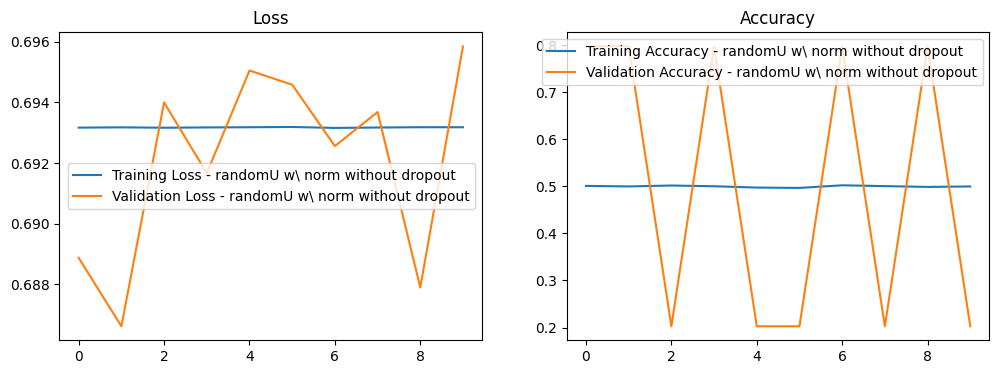

984/984 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


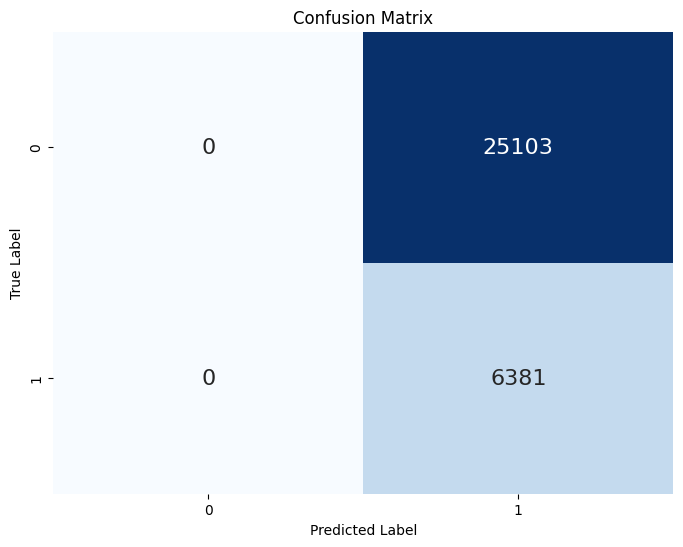

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     25103
           1       0.20      1.00      0.34      6381

    accuracy                           0.20     31484
   macro avg       0.10      0.50      0.17     31484
weighted avg       0.04      0.20      0.07     31484

ROC-AUC Score: 0.5000


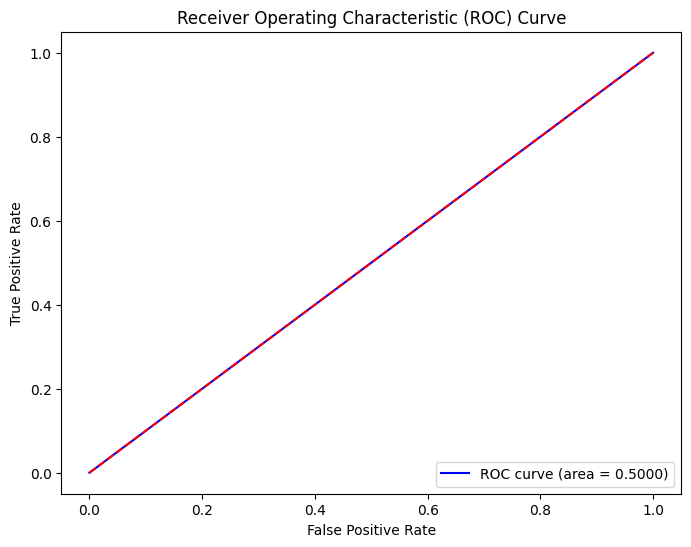

In [ ]:
from tensorflow.keras.initializers import GlorotNormal, HeNormal, RandomNormal, LecunNormal, GlorotUniform, HeUniform, RandomUniform, Zeros
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Define different initializers
initializer_glorotN = GlorotNormal()
initializer_heN = HeNormal()
initializer_randomN = RandomNormal()
initializer_lecunN = LecunNormal()
initializer_glorotU = GlorotUniform()
initializer_heU = HeUniform()
initializer_randomU_norm_only = RandomUniform()
initializer_zeros = Zeros()


adam = Adam(learning_rate=0.001)

# Model definition with Glorot Normal Initialization
model_randomU_norm_only = Sequential([
    layers.Input(shape=(10,)),
    layers.Dense(256, activation='relu', kernel_initializer=initializer_randomU_norm_only),
    layers.Dense(128, activation='relu', kernel_initializer=initializer_randomU_norm_only),
    layers.Dense(64, activation='relu', kernel_initializer=initializer_randomU_norm_only),
    layers.Dense(32, activation='relu', kernel_initializer=initializer_randomU_norm_only),
    layers.Dense(16, activation='relu', kernel_initializer=initializer_randomU_norm_only),
    layers.Dense(8, activation='relu', kernel_initializer=initializer_randomU_norm_only),
    layers.Dense(4, activation='relu', kernel_initializer=initializer_randomU_norm_only),
    layers.Dense(1, activation='sigmoid')
])


# Compile model
model_randomU_norm_only.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history_randomU_norm_only = model_randomU_norm_only.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=10)

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_randomU_norm_only.history['loss'], label='Training Loss - randomU w\ norm without dropout')
plt.plot(history_randomU_norm_only.history['val_loss'], label='Validation Loss - randomU w\ norm without dropout')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history_randomU_norm_only.history['accuracy'], label='Training Accuracy - randomU w\ norm without dropout')
plt.plot(history_randomU_norm_only.history['val_accuracy'], label='Validation Accuracy - randomU w\ norm without dropout')
plt.legend()
plt.title('Accuracy')

plt.show()

# eval
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc

# After predicting the values
y_pred_prob = model_randomU_norm_only.predict(X_test)
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Epoch 1/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 24s 3ms/step - accuracy: 0.5000 - loss: 0.6932 - val_accuracy: 0.7973 - val_loss: 0.6865
Epoch 2/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.4977 - loss: 0.6932 - val_accuracy: 0.7973 - val_loss: 0.6915
Epoch 3/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 22s 2ms/step - accuracy: 0.4976 - loss: 0.6932 - val_accuracy: 0.7973 - val_loss: 0.6920
Epoch 4/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.4993 - loss: 0.6932 - val_accuracy: 0.2027 - val_loss: 0.6942
Epoch 5/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.4994 - loss: 0.6932 - val_accuracy: 0.7973 - val_loss: 0.6896
Epoch 6/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.5017 - loss: 0.6932 - val_accuracy: 0.7973 - val_loss: 0.6931
Epoch 7/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.5021 - loss: 0.6932 - val_accuracy: 0.7973 - val_loss: 0.6890
Epoch 8/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.5025 - loss: 0

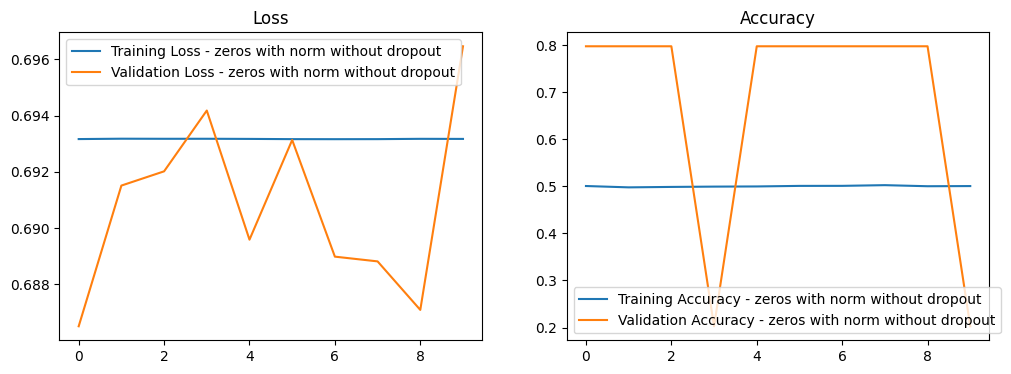

984/984 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


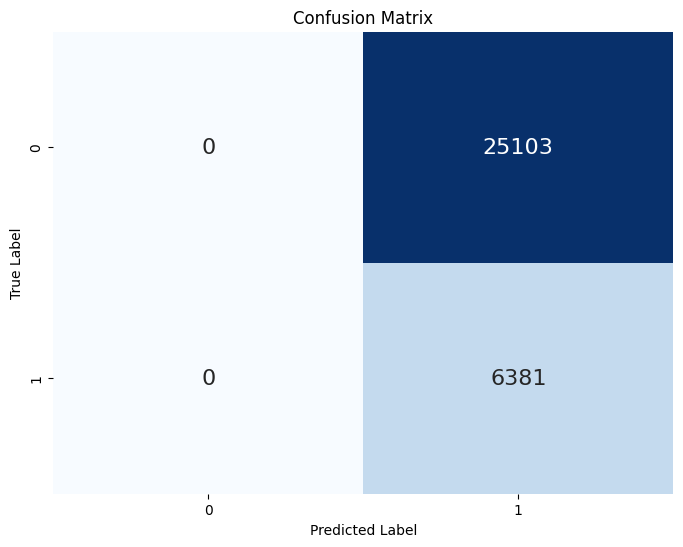

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     25103
           1       0.20      1.00      0.34      6381

    accuracy                           0.20     31484
   macro avg       0.10      0.50      0.17     31484
weighted avg       0.04      0.20      0.07     31484

ROC-AUC Score: 0.5000


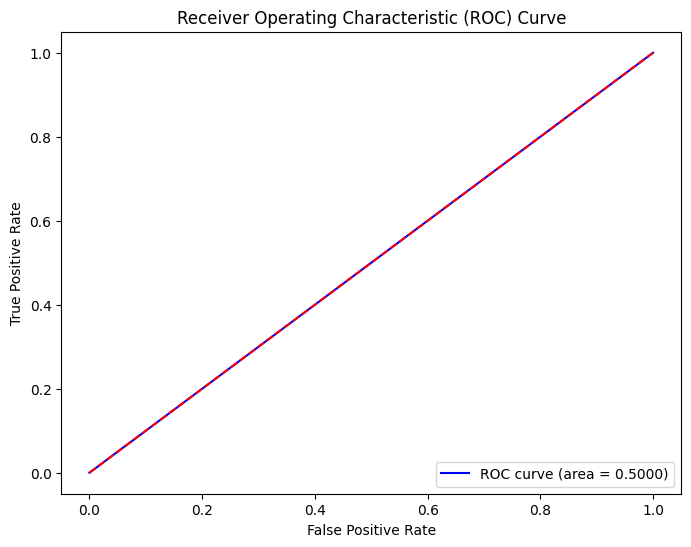

In [ ]:
from tensorflow.keras.initializers import GlorotNormal, HeNormal, RandomNormal, LecunNormal, GlorotUniform, HeUniform, RandomUniform, Zeros
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Define different initializers
initializer_glorotN = GlorotNormal()
initializer_heN = HeNormal()
initializer_randomN = RandomNormal()
initializer_lecunN = LecunNormal()
initializer_glorotU = GlorotUniform()
initializer_heU = HeUniform()
initializer_randomN = RandomUniform()
initializer_zeros_norm_only = Zeros()


adam = Adam(learning_rate=0.001)

# Model definition with Glorot Normal Initialization
model_zeros_norm_only = Sequential([
    layers.Input(shape=(10,)),
    layers.Dense(256, activation='relu', kernel_initializer=initializer_zeros_norm_only),
    layers.Dense(128, activation='relu', kernel_initializer=initializer_zeros_norm_only),
    layers.Dense(64, activation='relu', kernel_initializer=initializer_zeros_norm_only),
    layers.Dense(32, activation='relu', kernel_initializer=initializer_zeros_norm_only),
    layers.Dense(16, activation='relu', kernel_initializer=initializer_zeros_norm_only),
    layers.Dense(8, activation='relu', kernel_initializer=initializer_zeros_norm_only),
    layers.Dense(4, activation='relu', kernel_initializer=initializer_zeros_norm_only),
    layers.Dense(1, activation='sigmoid')
])


# Compile model
model_zeros_norm_only.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history_zeros_norm_only = model_zeros_norm_only.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=10)

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_zeros_norm_only.history['loss'], label='Training Loss - zeros with norm without dropout')
plt.plot(history_zeros_norm_only.history['val_loss'], label='Validation Loss - zeros with norm without dropout')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history_zeros_norm_only.history['accuracy'], label='Training Accuracy - zeros with norm without dropout')
plt.plot(history_zeros_norm_only.history['val_accuracy'], label='Validation Accuracy - zeros with norm without dropout')
plt.legend()
plt.title('Accuracy')

plt.show()

# eval
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc

# After predicting the values
y_pred_prob = model_zeros_norm_only.predict(X_test)
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

lecun uniform

Epoch 1/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 26s 3ms/step - accuracy: 0.8284 - loss: 0.4018 - val_accuracy: 0.8212 - val_loss: 0.4054
Epoch 2/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.8556 - loss: 0.3382 - val_accuracy: 0.8269 - val_loss: 0.3959
Epoch 3/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.8565 - loss: 0.3358 - val_accuracy: 0.8229 - val_loss: 0.3948
Epoch 4/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - accuracy: 0.8571 - loss: 0.3334 - val_accuracy: 0.8341 - val_loss: 0.3883
Epoch 5/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.8577 - loss: 0.3337 - val_accuracy: 0.8283 - val_loss: 0.3979
Epoch 6/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step - accuracy: 0.8574 - loss: 0.3334 - val_accuracy: 0.8255 - val_loss: 0.3863
Epoch 7/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.8578 - loss: 0.3329 - val_accuracy: 0.8395 - val_loss: 0.3776
Epoch 8/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.8578 - loss: 0

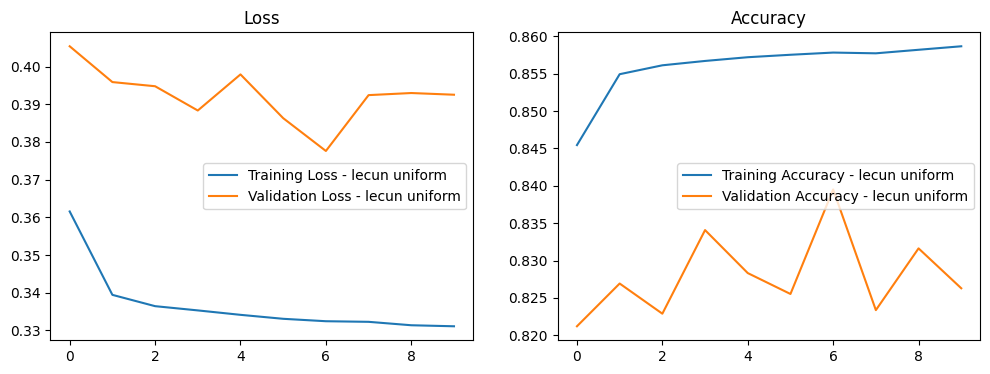

984/984 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


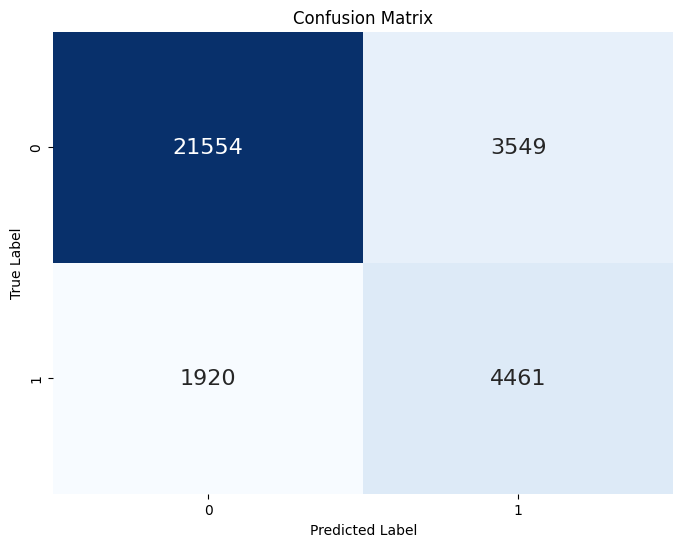

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.86      0.89     25103
           1       0.56      0.70      0.62      6381

    accuracy                           0.83     31484
   macro avg       0.74      0.78      0.75     31484
weighted avg       0.84      0.83      0.83     31484

ROC-AUC Score: 0.8668


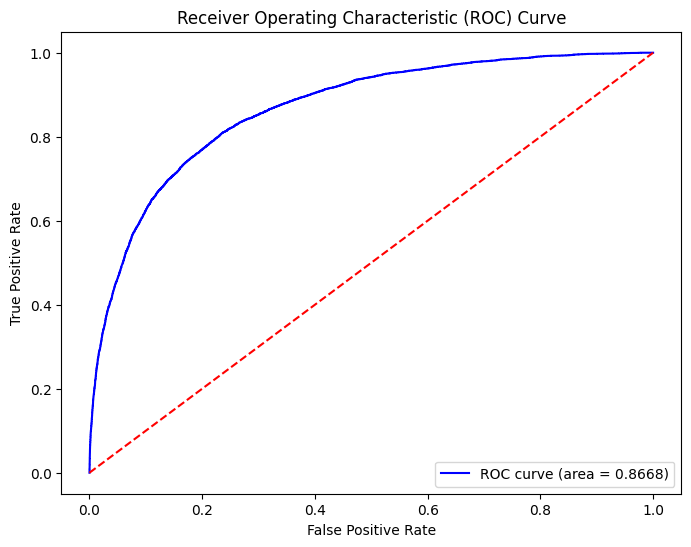

In [ ]:
from tensorflow.keras.initializers import GlorotNormal, HeNormal, RandomNormal, LecunNormal, GlorotUniform, HeUniform, RandomUniform, Zeros,LecunUniform
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Define different initializers
initializer_glorotN = GlorotNormal()
initializer_heN = HeNormal()
initializer_randomN = RandomNormal()
initializer_lecunN = LecunNormal()
initializer_glorotU = GlorotUniform()
initializer_heU = HeUniform()
initializer_randomN = RandomUniform()
initializer_zeros_norm_only = Zeros()

initializer_lecunU = LecunUniform()


adam = Adam(learning_rate=0.001)

# Model definition with Glorot Normal Initialization
model_lecunU_only = Sequential([
    layers.Input(shape=(10,)),
    layers.Dense(256, activation='relu', kernel_initializer=initializer_lecunU),
    layers.Dense(128, activation='relu', kernel_initializer=initializer_lecunU),
    layers.Dense(64, activation='relu', kernel_initializer=initializer_lecunU),
    layers.Dense(32, activation='relu', kernel_initializer=initializer_lecunU),
    layers.Dense(16, activation='relu', kernel_initializer=initializer_lecunU),
    layers.Dense(8, activation='relu', kernel_initializer=initializer_lecunU),
    layers.Dense(4, activation='relu', kernel_initializer=initializer_lecunU),
    layers.Dense(1, activation='sigmoid')
])


# Compile model
model_lecunU_only.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history_lecunU_only = model_lecunU_only.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=10)

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_lecunU_only.history['loss'], label='Training Loss - lecun uniform')
plt.plot(history_lecunU_only.history['val_loss'], label='Validation Loss - lecun uniform')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history_lecunU_only.history['accuracy'], label='Training Accuracy - lecun uniform')
plt.plot(history_lecunU_only.history['val_accuracy'], label='Validation Accuracy - lecun uniform')
plt.legend()
plt.title('Accuracy')

plt.show()

# eval
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc

# After predicting the values
y_pred_prob = model_lecunU_only.predict(X_test)
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Epoch 1/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - accuracy: 0.8160 - loss: 0.4094 - val_accuracy: 0.8051 - val_loss: 0.4166
Epoch 2/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 35s 3ms/step - accuracy: 0.8417 - loss: 0.3642 - val_accuracy: 0.8215 - val_loss: 0.3958
Epoch 3/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.8493 - loss: 0.3554 - val_accuracy: 0.8220 - val_loss: 0.3995
Epoch 4/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.8515 - loss: 0.3506 - val_accuracy: 0.8255 - val_loss: 0.3889
Epoch 5/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.8533 - loss: 0.3464 - val_accuracy: 0.8129 - val_loss: 0.4162
Epoch 6/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.8534 - loss: 0.3473 - val_accuracy: 0.8117 - val_loss: 0.4122
Epoch 7/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8542 - loss: 0.3449 - val_accuracy: 0.8123 - val_loss: 0.4145
Epoch 8/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.8558 - loss: 0

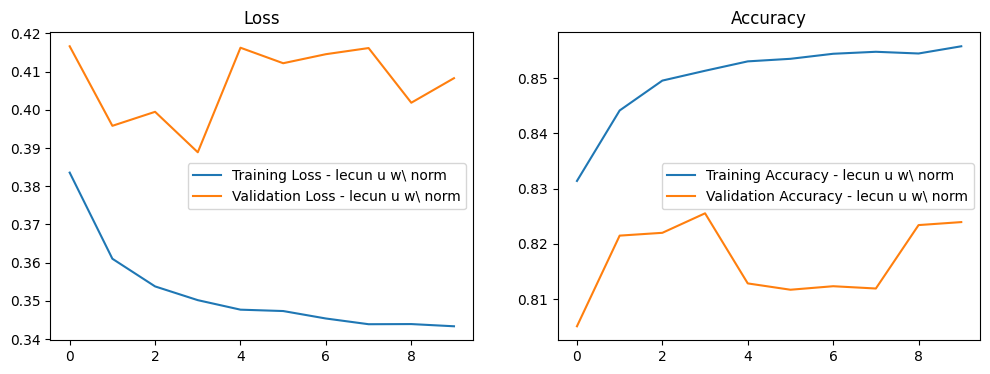

984/984 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


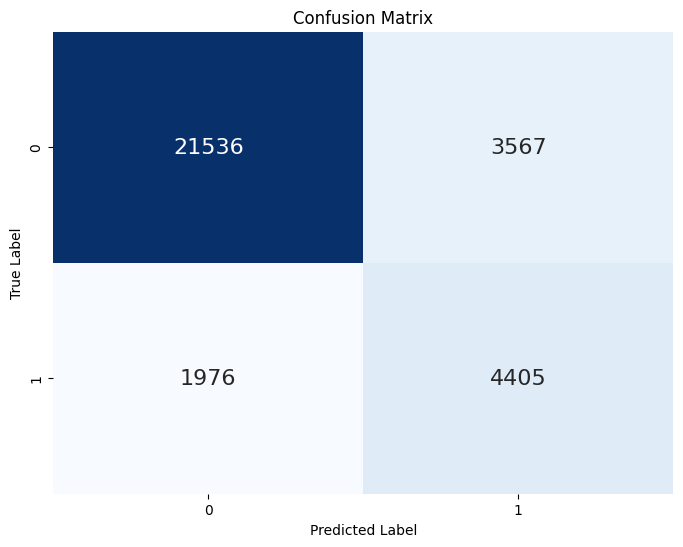

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.86      0.89     25103
           1       0.55      0.69      0.61      6381

    accuracy                           0.82     31484
   macro avg       0.73      0.77      0.75     31484
weighted avg       0.84      0.82      0.83     31484

ROC-AUC Score: 0.8638


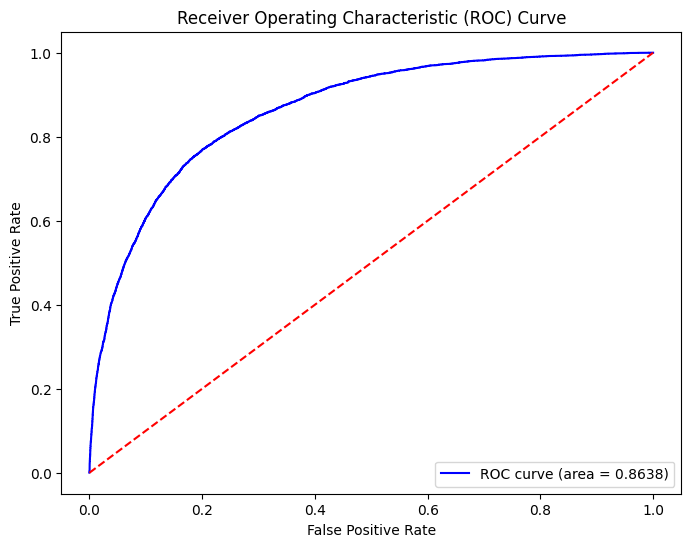

In [ ]:
from tensorflow.keras.initializers import GlorotNormal, HeNormal, RandomNormal, LecunNormal, GlorotUniform, HeUniform, RandomUniform, Zeros,LecunUniform
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Define different initializers
initializer_glorotN = GlorotNormal()
initializer_heN = HeNormal()
initializer_randomN = RandomNormal()
initializer_lecunN = LecunNormal()
initializer_glorotU = GlorotUniform()
initializer_heU = HeUniform()
initializer_randomU_norm = RandomUniform()
initializer_zeros = Zeros()
initializer_lecunU = LecunUniform()

adam = Adam(learning_rate=0.001)

# Model definition with Glorot Normal Initialization
model_lecunU_batch = Sequential([
    layers.Input(shape=(10,)),
    layers.Dense(256, activation='relu', kernel_initializer=initializer_lecunU),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu', kernel_initializer=initializer_lecunU),
    layers.BatchNormalization(),
    layers.Dense(64, activation='relu', kernel_initializer=initializer_lecunU),
    layers.BatchNormalization(),
    layers.Dense(32, activation='relu', kernel_initializer=initializer_lecunU),
    layers.BatchNormalization(),
    layers.Dense(16, activation='relu', kernel_initializer=initializer_lecunU),
    layers.BatchNormalization(),
    layers.Dense(8, activation='relu', kernel_initializer=initializer_lecunU),
    layers.BatchNormalization(),
    layers.Dense(4, activation='relu', kernel_initializer=initializer_lecunU),
    layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid')
])


# Compile model
model_lecunU_batch.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history_lecunU_batch = model_lecunU_batch.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=10)

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_lecunU_batch.history['loss'], label='Training Loss - lecun u w\ norm')
plt.plot(history_lecunU_batch.history['val_loss'], label='Validation Loss - lecun u w\ norm')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history_lecunU_batch.history['accuracy'], label='Training Accuracy - lecun u w\ norm')
plt.plot(history_lecunU_batch.history['val_accuracy'], label='Validation Accuracy - lecun u w\ norm')
plt.legend()
plt.title('Accuracy')

plt.show()

# eval
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc

# After predicting the values
y_pred_prob = model_lecunU_batch.predict(X_test)
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Epoch 1/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 35s 4ms/step - accuracy: 0.7760 - loss: 0.5068 - val_accuracy: 0.8233 - val_loss: 0.4157
Epoch 2/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.8222 - loss: 0.4305 - val_accuracy: 0.8247 - val_loss: 0.4212
Epoch 3/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8254 - loss: 0.4188 - val_accuracy: 0.8325 - val_loss: 0.4083
Epoch 4/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.8257 - loss: 0.4190 - val_accuracy: 0.8151 - val_loss: 0.4187
Epoch 5/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.8267 - loss: 0.4153 - val_accuracy: 0.8129 - val_loss: 0.4220
Epoch 6/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.8291 - loss: 0.4149 - val_accuracy: 0.8167 - val_loss: 0.4155
Epoch 7/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.8293 - loss: 0.4109 - val_accuracy: 0.8330 - val_loss: 0.3875
Epoch 8/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step - accuracy: 0.8293 - loss: 0

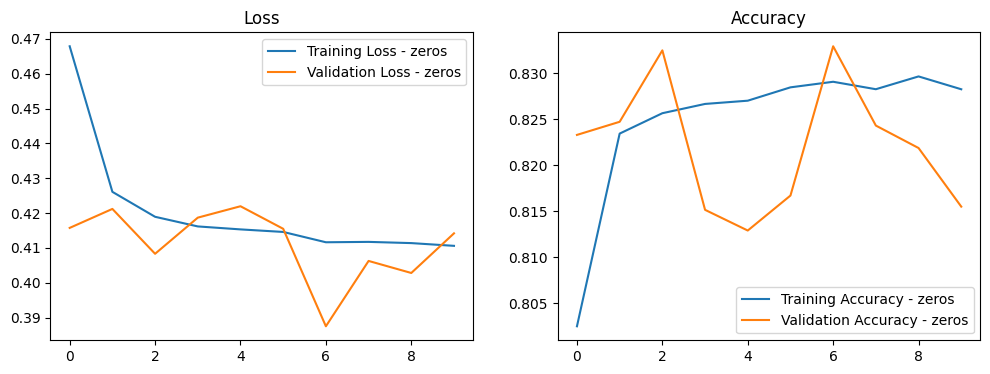

984/984 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


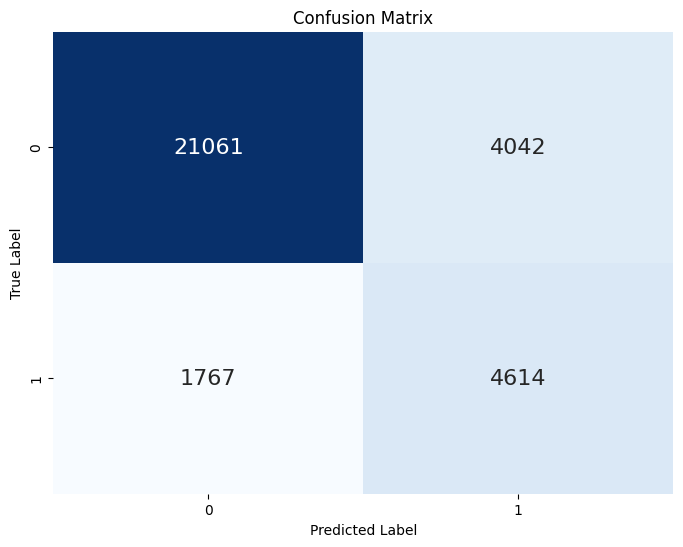

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.84      0.88     25103
           1       0.53      0.72      0.61      6381

    accuracy                           0.82     31484
   macro avg       0.73      0.78      0.75     31484
weighted avg       0.84      0.82      0.83     31484

ROC-AUC Score: 0.8643


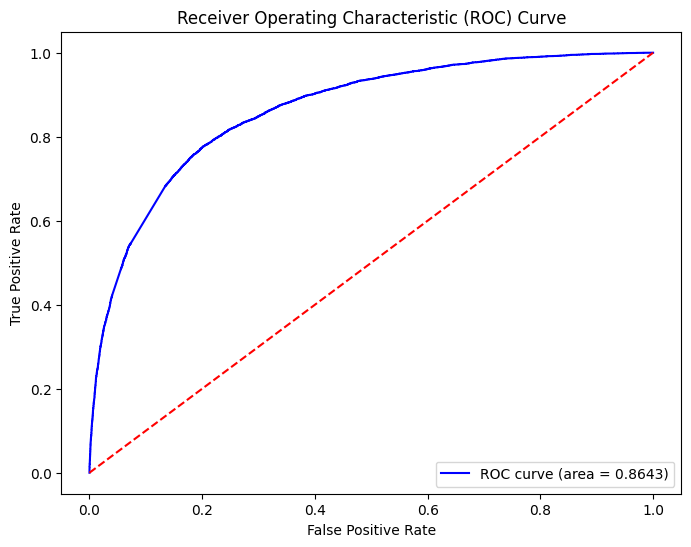

In [ ]:
from tensorflow.keras.initializers import GlorotNormal, HeNormal, RandomNormal, LecunNormal, GlorotUniform, HeUniform, RandomUniform, Zeros,LecunUniform
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Define different initializers
initializer_glorotN = GlorotNormal()
initializer_heN = HeNormal()
initializer_randomN = RandomNormal()
initializer_lecunN = LecunNormal()
initializer_glorotU = GlorotUniform()
initializer_heU = HeUniform()
initializer_randomN = RandomUniform()
initializer_zeros = Zeros()

initializer_lecunU = LecunUniform()

adam = Adam(learning_rate=0.001)

# Model definition with Glorot Normal Initialization
model_lecunDropout = Sequential([
    layers.Input(shape=(10,)),
    layers.Dense(256, activation='relu', kernel_initializer=initializer_lecunU),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu', kernel_initializer=initializer_lecunU),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu', kernel_initializer=initializer_lecunU),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu', kernel_initializer=initializer_lecunU),
    layers.Dropout(0.3),
    layers.Dense(16, activation='relu', kernel_initializer=initializer_lecunU),
    layers.Dropout(0.3),
    layers.Dense(8, activation='relu', kernel_initializer=initializer_lecunU),
    layers.Dropout(0.3),
    layers.Dense(4, activation='relu', kernel_initializer=initializer_lecunU),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])


# Compile model
model_lecunDropout.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history_lecunDropout = model_lecunDropout.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=10)

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_lecunDropout.history['loss'], label='Training Loss - zeros')
plt.plot(history_lecunDropout.history['val_loss'], label='Validation Loss - zeros')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history_lecunDropout.history['accuracy'], label='Training Accuracy - zeros')
plt.plot(history_lecunDropout.history['val_accuracy'], label='Validation Accuracy - zeros')
plt.legend()
plt.title('Accuracy')

plt.show()

# eval
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc

# After predicting the values
y_pred_prob = model_lecunDropout.predict(X_test)
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Epoch 1/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 37s 4ms/step - accuracy: 0.7431 - loss: 0.5327 - val_accuracy: 0.8235 - val_loss: 0.4099
Epoch 2/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 30s 3ms/step - accuracy: 0.8251 - loss: 0.4153 - val_accuracy: 0.8287 - val_loss: 0.3985
Epoch 3/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 41s 3ms/step - accuracy: 0.8306 - loss: 0.4067 - val_accuracy: 0.8329 - val_loss: 0.3979
Epoch 4/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - accuracy: 0.8326 - loss: 0.4025 - val_accuracy: 0.8388 - val_loss: 0.3926
Epoch 5/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8336 - loss: 0.4000 - val_accuracy: 0.8149 - val_loss: 0.4082
Epoch 6/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8353 - loss: 0.3969 - val_accuracy: 0.8297 - val_loss: 0.3925
Epoch 7/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8375 - loss: 0.3966 - val_accuracy: 0.8318 - val_loss: 0.3903
Epoch 8/10
6277/6277 ━━━━━━━━━━━━━━━━━━━━ 22s 3ms/step - accuracy: 0.8393 - loss: 0

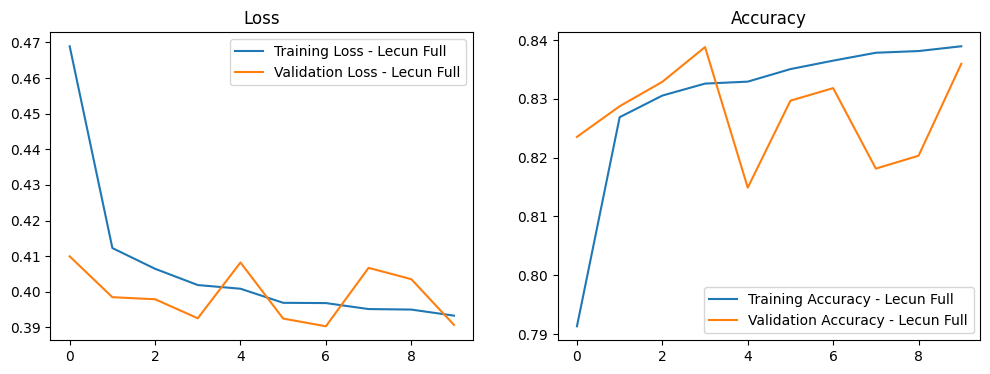

984/984 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


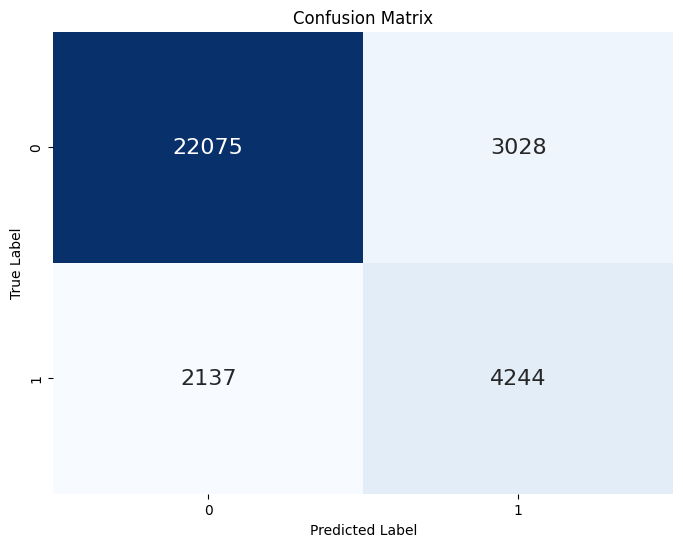

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.88      0.90     25103
           1       0.58      0.67      0.62      6381

    accuracy                           0.84     31484
   macro avg       0.75      0.77      0.76     31484
weighted avg       0.85      0.84      0.84     31484

ROC-AUC Score: 0.8673


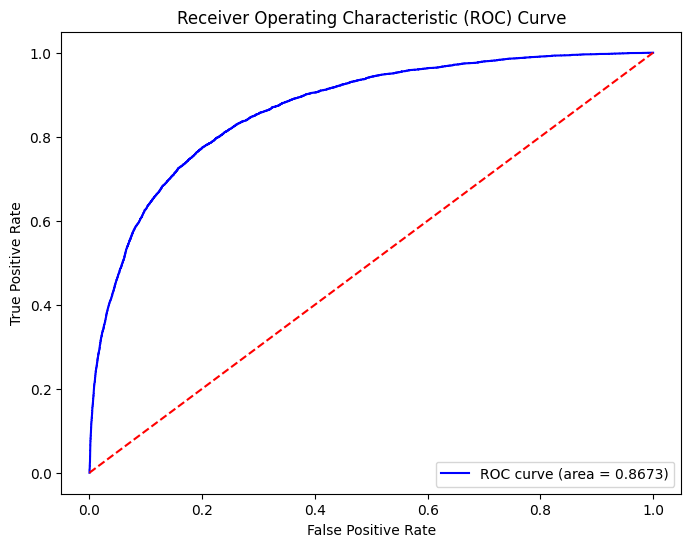

In [ ]:
from tensorflow.keras.initializers import GlorotNormal, HeNormal, RandomNormal, LecunNormal, GlorotUniform, HeUniform, RandomUniform, Zeros,LecunUniform
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Define different initializers
initializer_glorotN = GlorotNormal()
initializer_heN = HeNormal()
initializer_randomN = RandomNormal()
initializer_lecunN = LecunNormal()
initializer_glorotU = GlorotUniform()
initializer_heU = HeUniform()
initializer_randomN = RandomUniform()
initializer_zeros_norm = Zeros()

initializer_lecunU = LecunUniform()

adam = Adam(learning_rate=0.001)

# Model definition with Glorot Normal Initialization
model_lecunUfull = Sequential([
    layers.Input(shape=(10,)),
    layers.Dense(256, activation='relu', kernel_initializer=initializer_lecunU),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu', kernel_initializer=initializer_lecunU),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu', kernel_initializer=initializer_lecunU),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu', kernel_initializer=initializer_lecunU),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(16, activation='relu', kernel_initializer=initializer_lecunU),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(8, activation='relu', kernel_initializer=initializer_lecunU),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(4, activation='relu', kernel_initializer=initializer_lecunU),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])


# Compile model
model_lecunUfull.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history_lecunUfull = model_lecunUfull.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=10)

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_lecunUfull.history['loss'], label='Training Loss - Lecun Full')
plt.plot(history_lecunUfull.history['val_loss'], label='Validation Loss - Lecun Full')
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history_lecunUfull.history['accuracy'], label='Training Accuracy - Lecun Full')
plt.plot(history_lecunUfull.history['val_accuracy'], label='Validation Accuracy - Lecun Full')
plt.legend()
plt.title('Accuracy')

plt.show()

# eval
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc

# After predicting the values
y_pred_prob = model_lecunUfull.predict(X_test)
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.4f}")

# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()